In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [102]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [116]:
REFERENCE_TREE_FILE = Path("data/thinned_mcmc_runs/yule-10_204.trees")
SAMPLE_TREES_FILE = Path("data/distribution_data/yule-10_204_sampled-trees_dirichlet.trees")
NUM_TAXA = 10

In [104]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE)

In [117]:
sample_trees = load_trees_from_file(SAMPLE_TREES_FILE)
sample_trees = [
    t for t in sample_trees if get_tree_height(t) < 100
]

In [118]:
taxa_names = get_taxa_names(ref_trees[0])

In [119]:
sample_clades, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)
ref_clades, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches = get_clade_split_df(sample_clade_splits)
ref_branches = get_clade_split_df(ref_clade_splits)

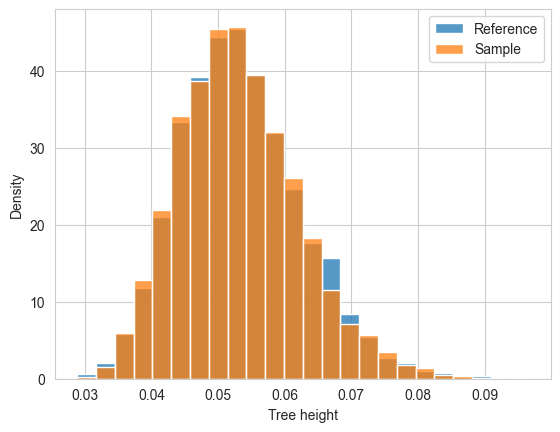

In [120]:
from random import sample
import numpy as np

NUM_PAIRS = 5_000
SAMPLE_SIZE = 5_000
NUM_BINS = 25


ref_tree_heights = [
    get_tree_height(tree)
    for tree in sample(ref_trees, min(SAMPLE_SIZE, len(ref_trees)))
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample(sample_trees, min(SAMPLE_SIZE, len(sample_trees)))
]


def _get_bins(items: list[float]):
    min_item = np.percentile(items, 0.001)
    max_item = np.percentile(items, 99.999)
    return np.linspace(min_item, max_item, NUM_BINS)

bins = _get_bins(ref_tree_heights)

sns.histplot(ref_tree_heights, stat="density", label="Reference", bins=bins)
sns.histplot(sample_tree_heights, stat="density", label="Sample", bins=bins)

plt.xlabel("Tree height")
plt.legend(loc="upper right")

0000100000||1000000000


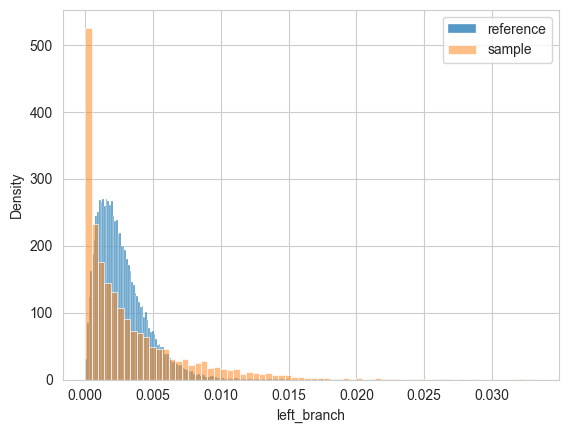

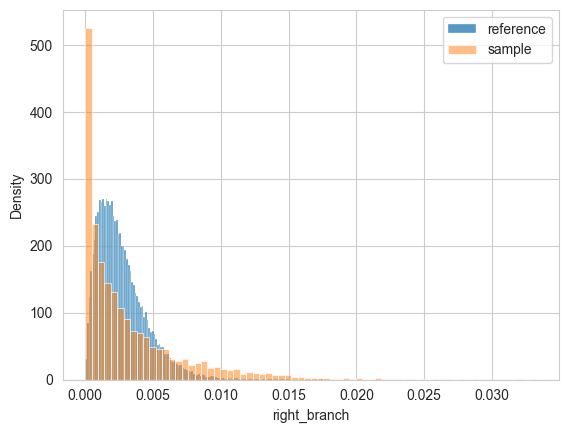

1000100100||0000001000


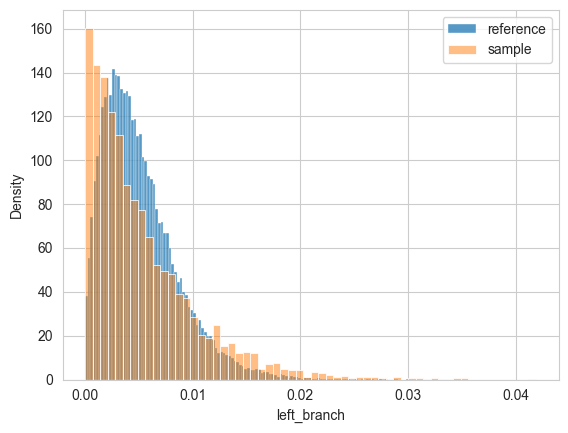

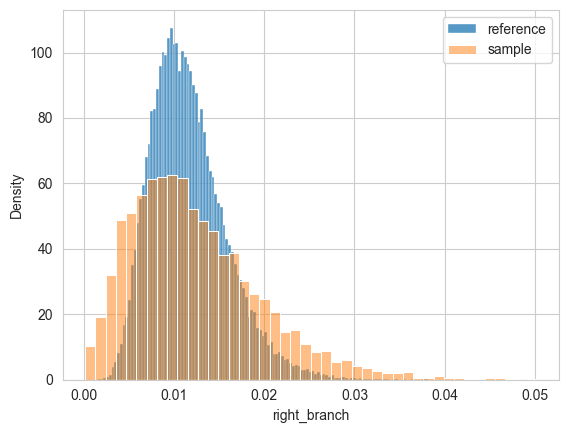

0000010000||0001000000


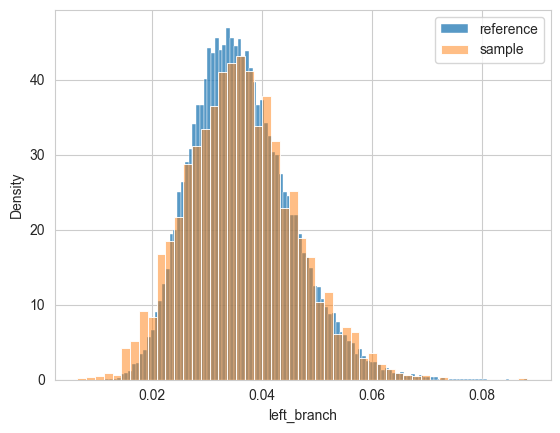

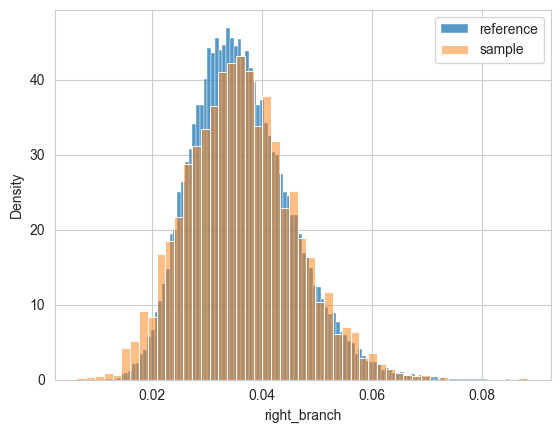

0000000100||1000100000


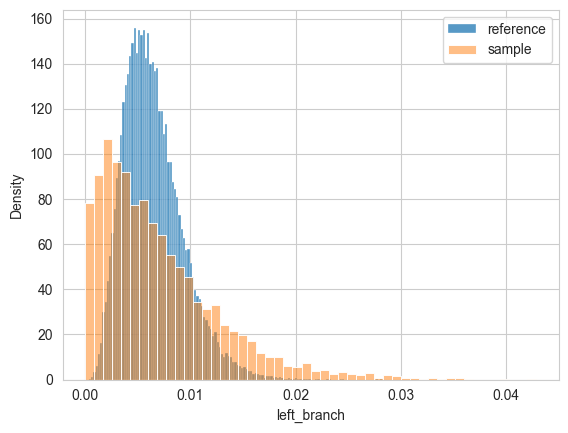

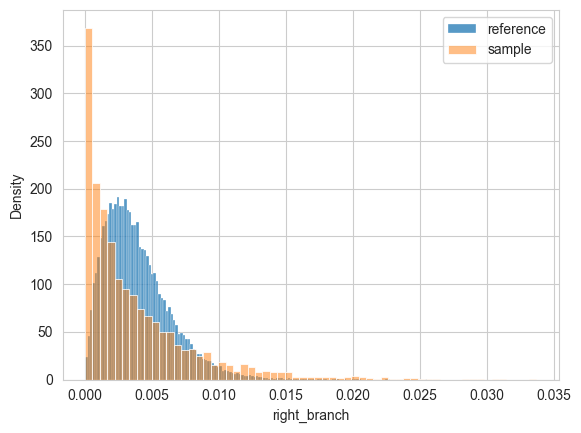

0000000001||0100000000


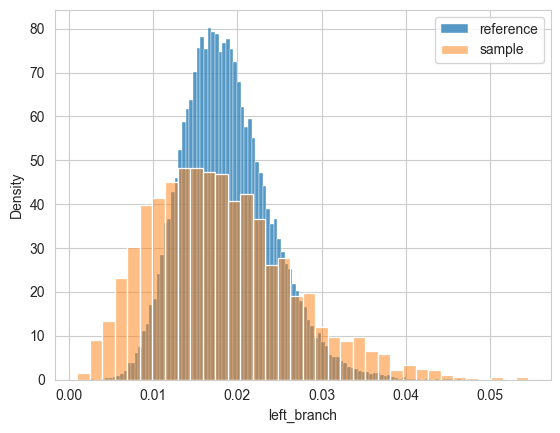

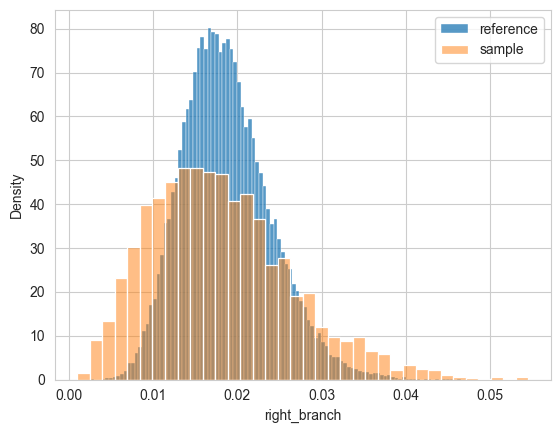

0110000011||1000101100


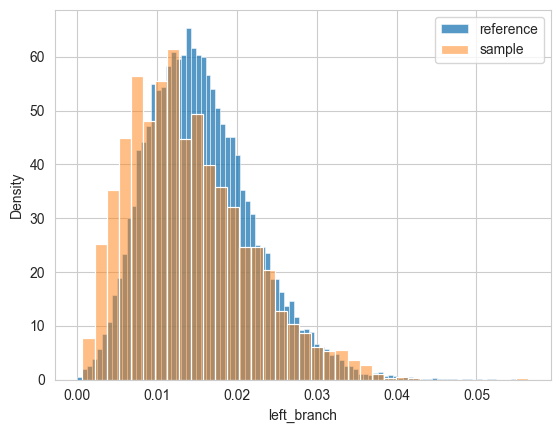

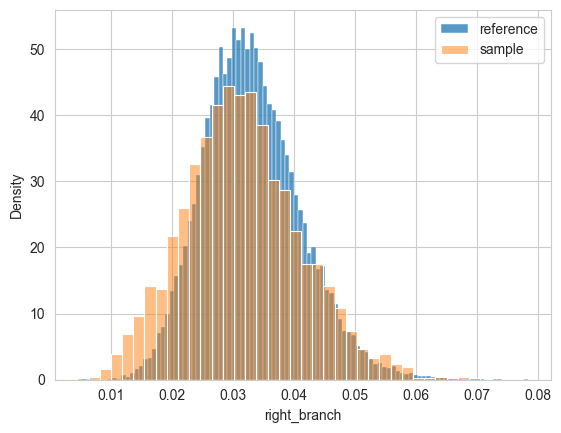

1110101111||0001010000


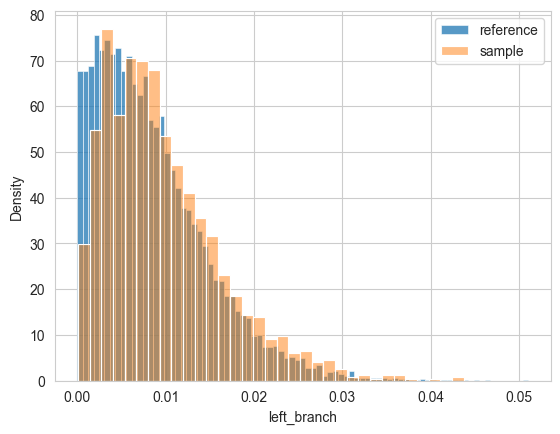

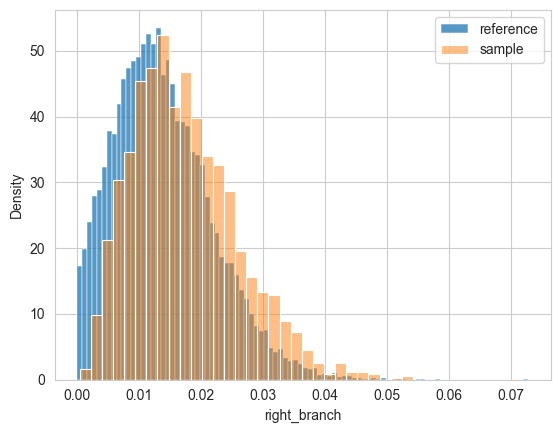

0100000011||0010000000


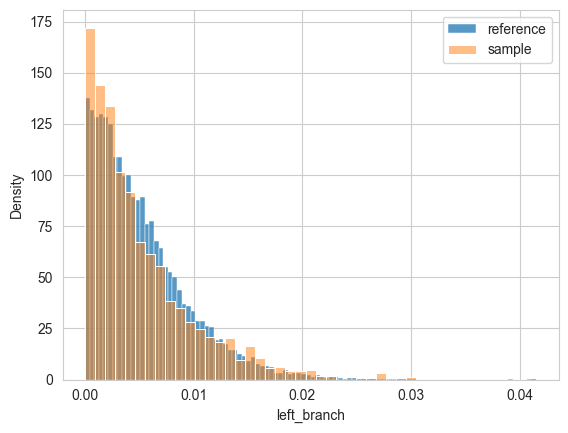

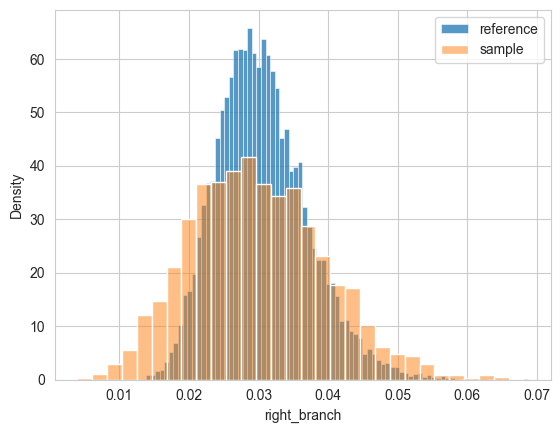

0110000001||0000000010


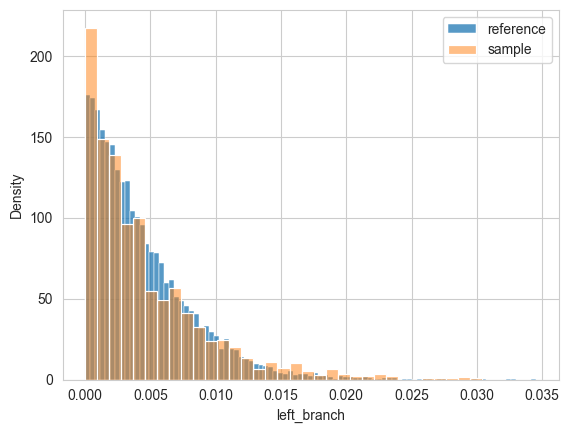

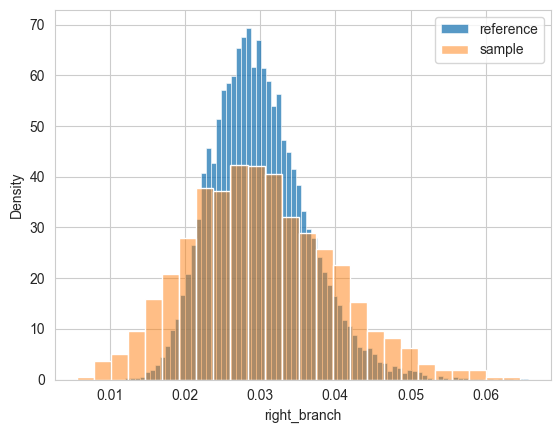

0100000001||0000000010


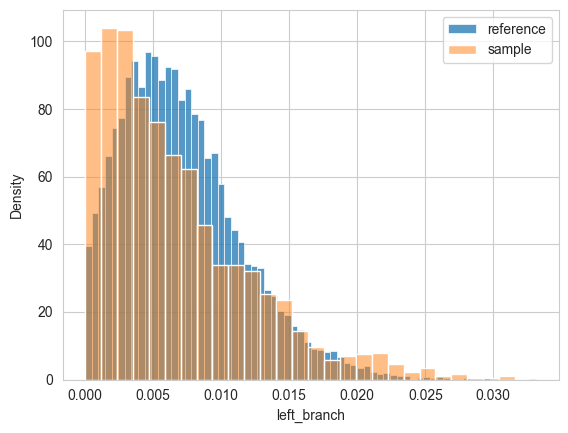

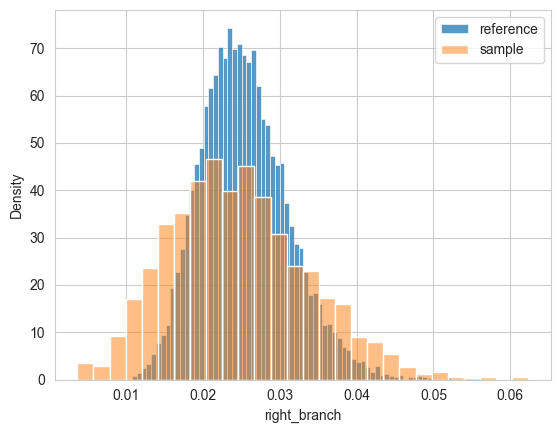

0110000011||1001111100


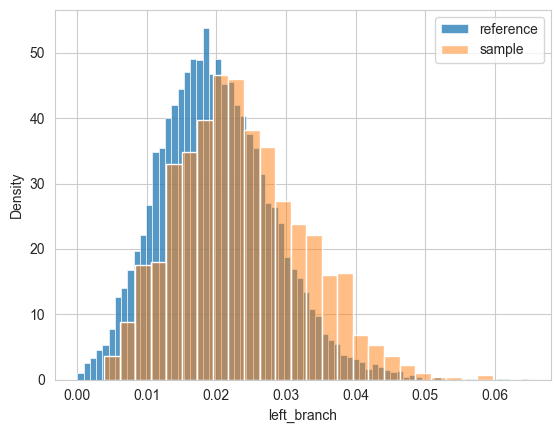

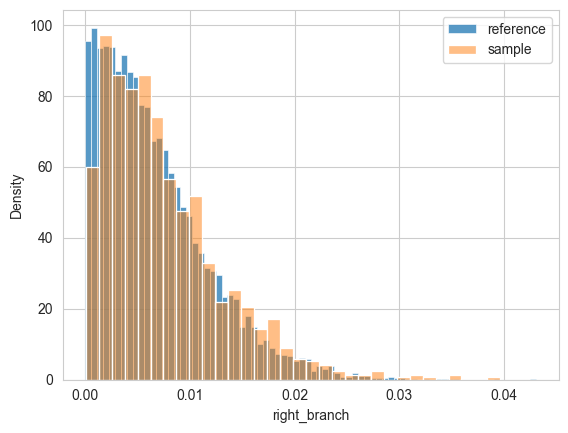

1000101100||0001010000


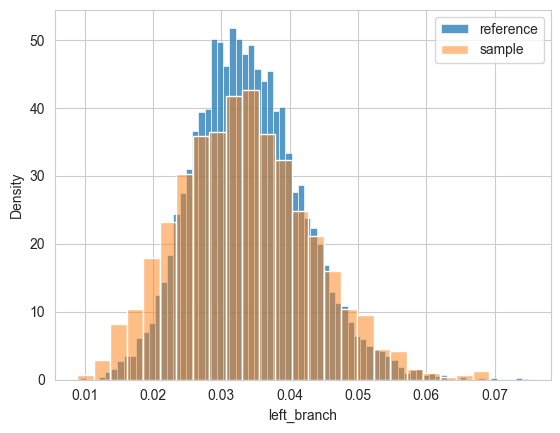

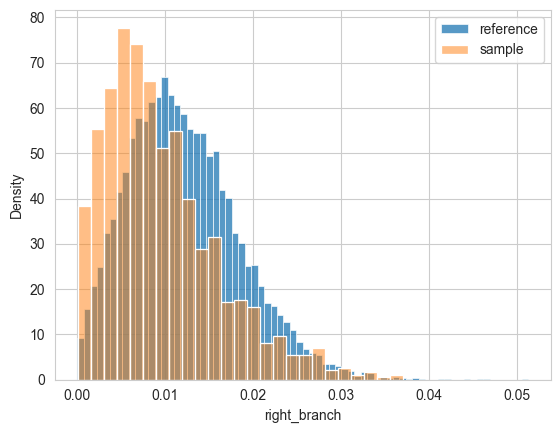

0000000001||0010000000


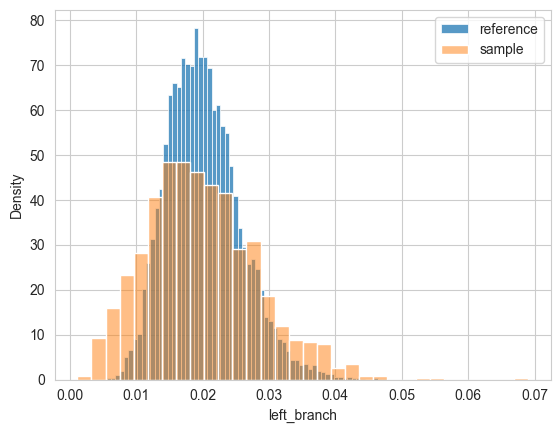

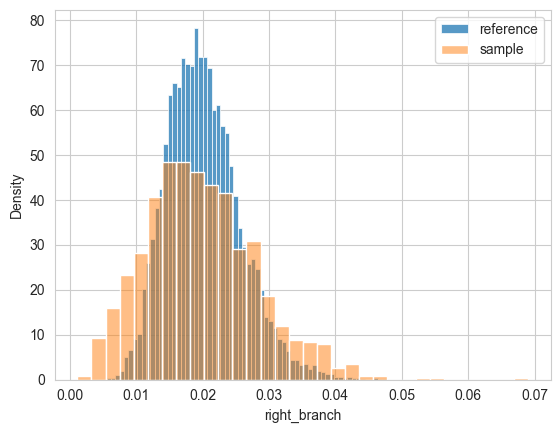

0100000001||0010000000


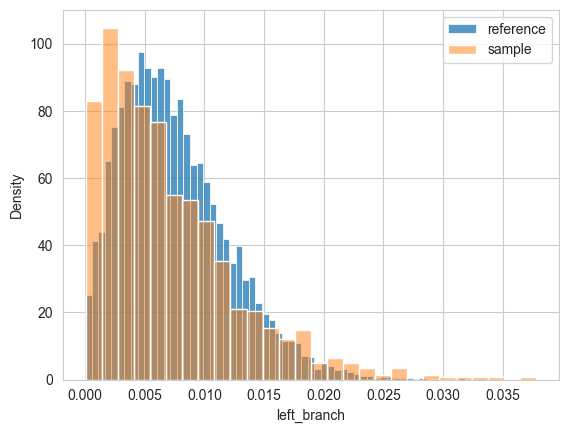

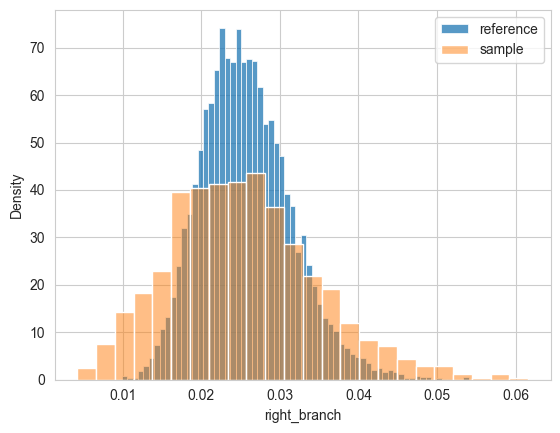

0111010011||1000101100


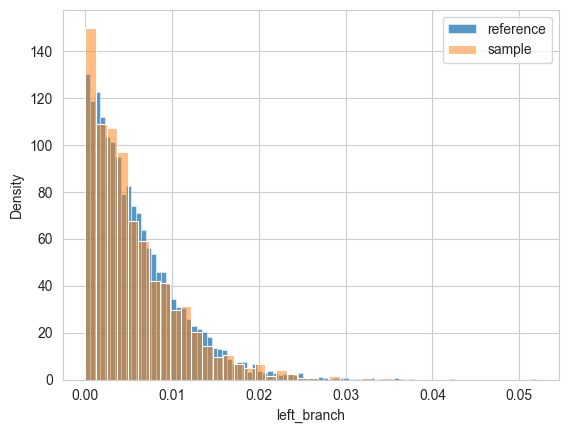

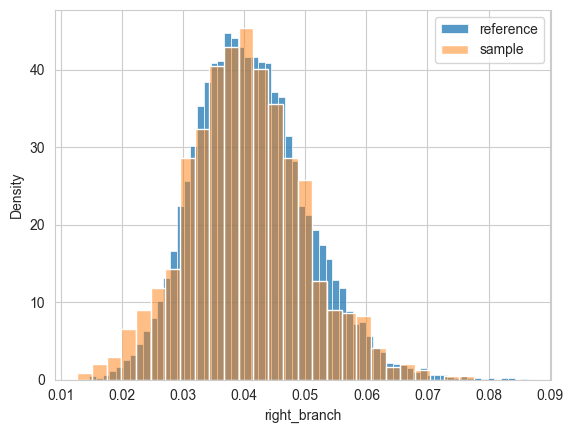

0110000011||0001010000


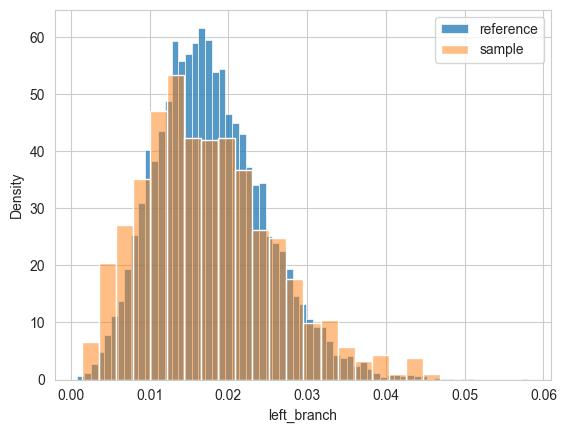

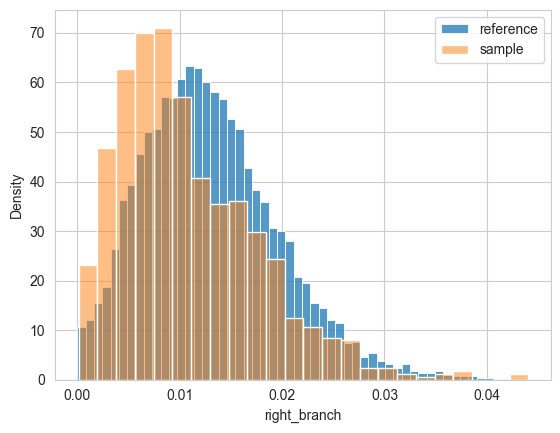

0000000010||0010000000


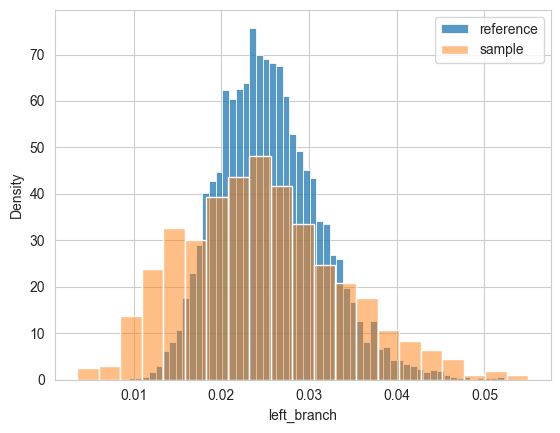

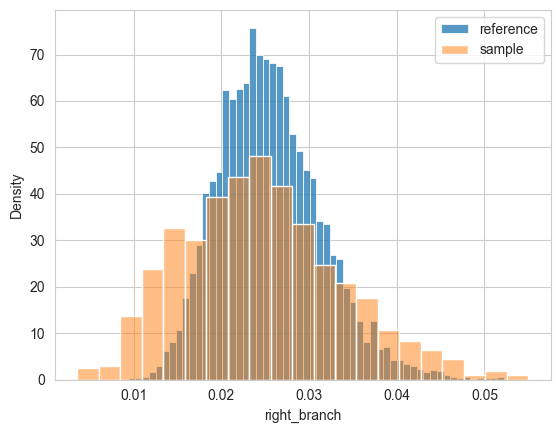

0100000001||0010000010


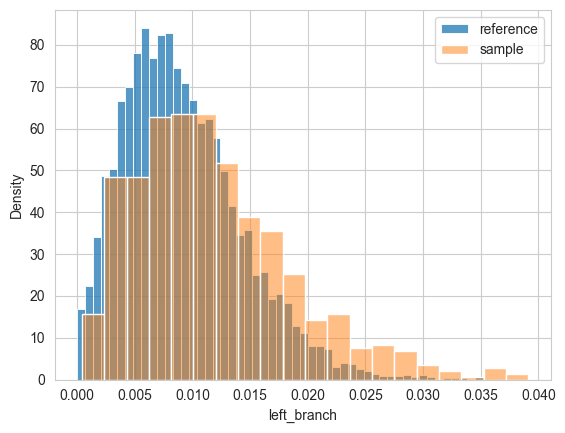

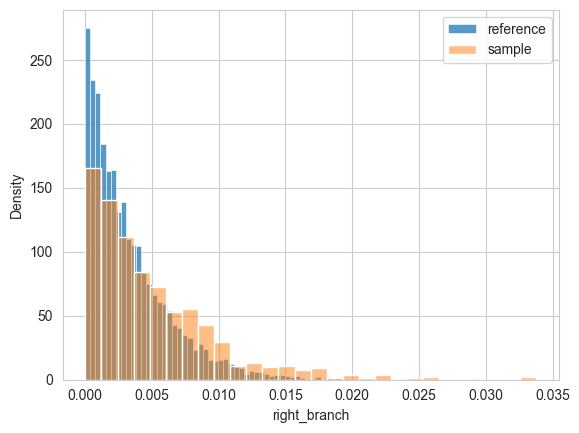

0000000010||0100000000


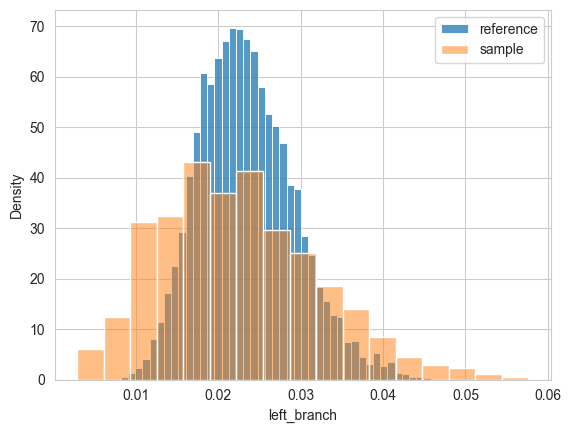

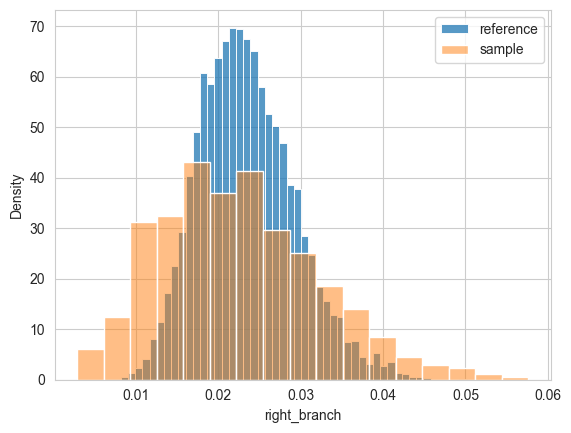

0010000011||0100000000


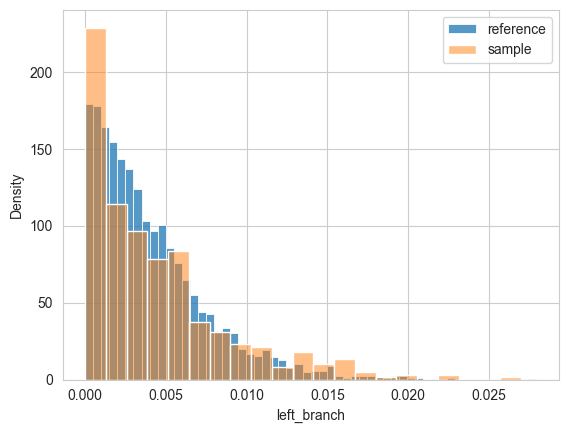

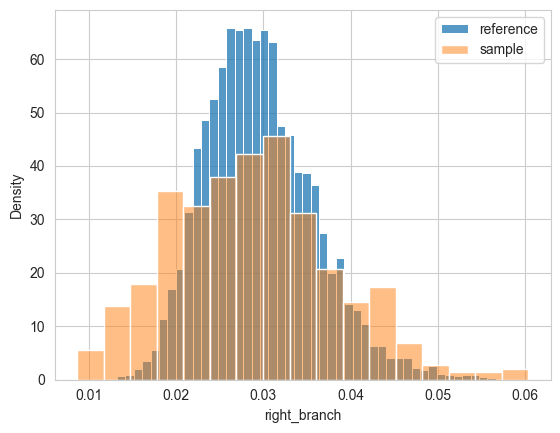

In [121]:
from collections import Counter

sample_branches["left_tree_ratio"] = sample_branches.left_branch / sample_branches.height

for clade, _ in Counter(ref_branches.clade_split).most_common(20):
    print(clade)

    sns.histplot(
        ref_branches[ref_branches.clade_split == clade], 
        x="left_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade], 
        x="left_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

    sns.histplot(
        ref_branches[ref_branches.clade_split == clade], 
        x="right_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade], 
        x="right_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()




In [110]:
import pandas as pd


df_dict = {
    "clade": [],
    "left_branch": [],
    "right_branch": [],
}

for clade in ref_clades:
    if clade.is_leaf: continue

    df_dict["clade"].append(str(clade))

    left = clade.left_clade.height - clade.height
    right = clade.right_clade.height - clade.height

    df_dict["left_branch"].append(left)
    df_dict["right_branch"].append(right)

ref_clades_df = pd.DataFrame(df_dict)

df_dict = {
    "clade": [],
    "left_branch": [],
    "right_branch": [],
}

for clade in sample_clades:
    if clade.is_leaf: continue

    df_dict["clade"].append(str(clade))

    left = clade.left_clade.height - clade.height
    right = clade.right_clade.height - clade.height

    df_dict["left_branch"].append(left)
    df_dict["right_branch"].append(right)

sample_clades_df = pd.DataFrame(df_dict)

0000100000||1000000000


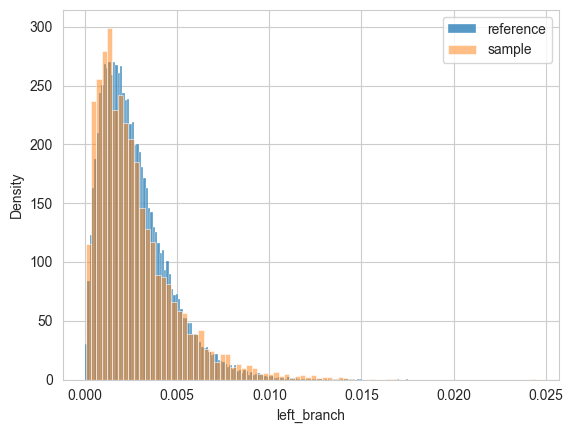

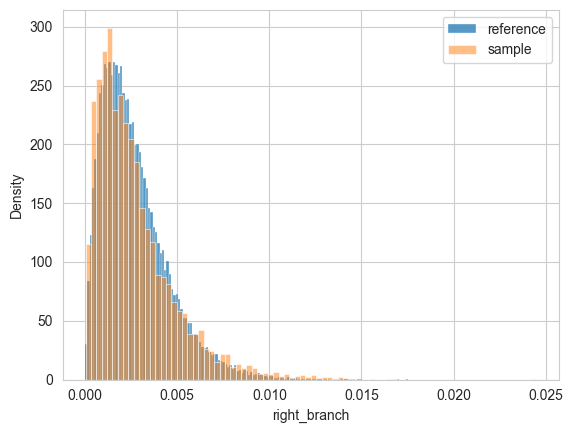

1000100100||0000001000


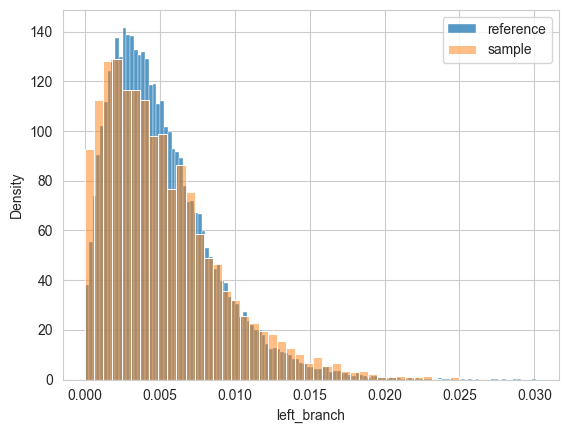

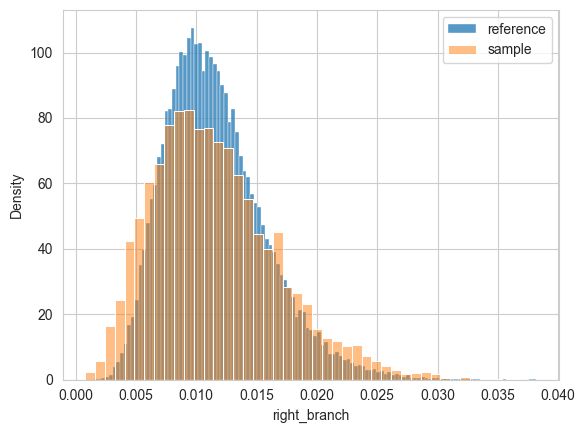

0000010000||0001000000


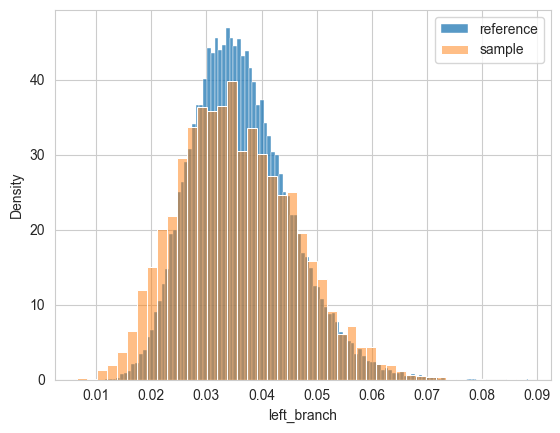

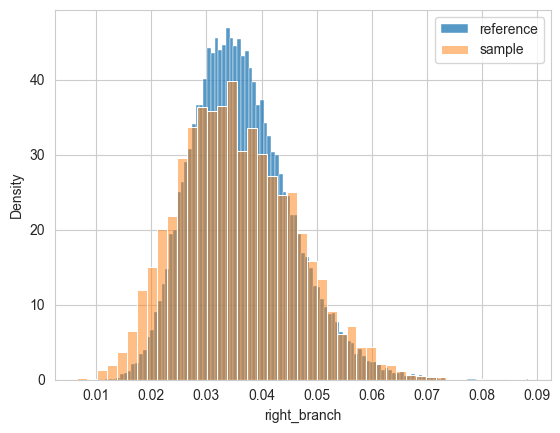

0000000100||1000100000


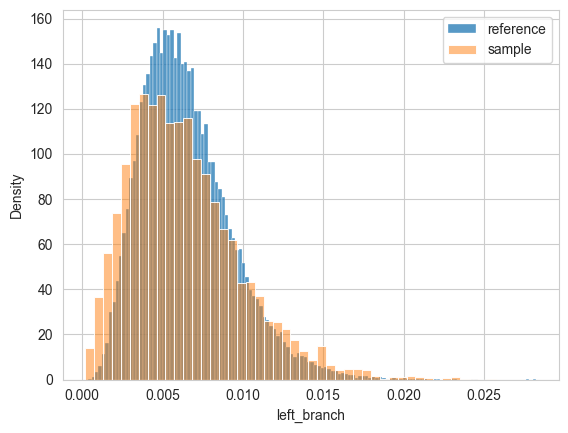

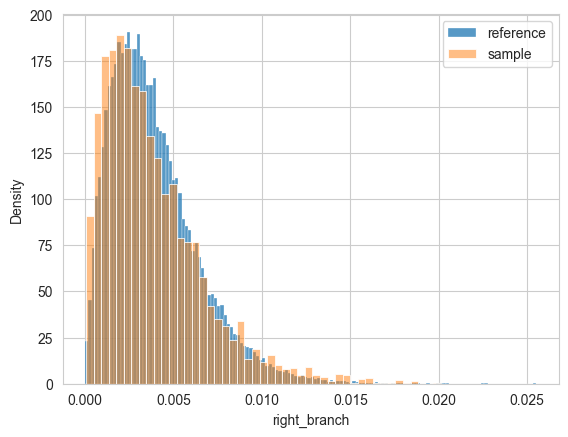

0000000001||0100000000


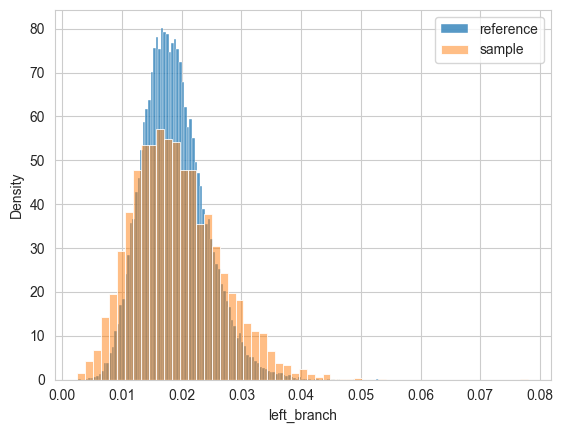

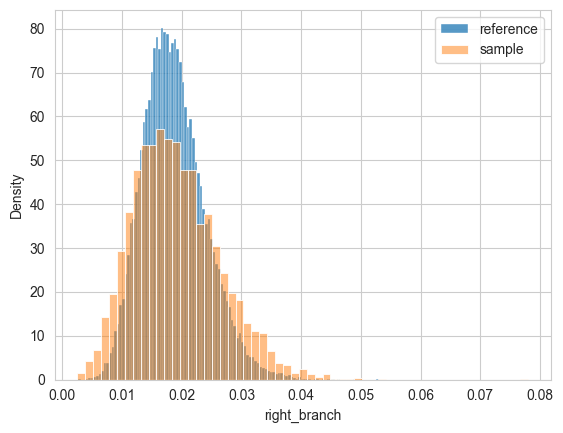

0110000011||1000101100


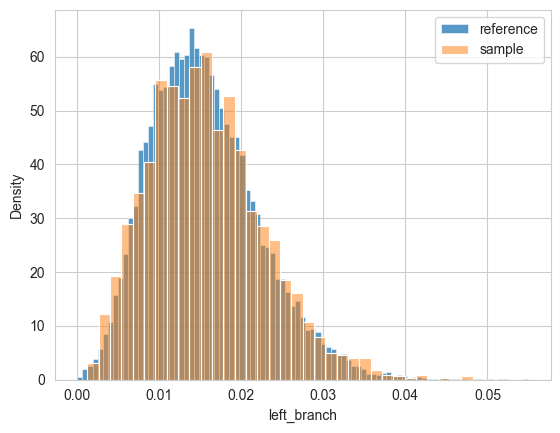

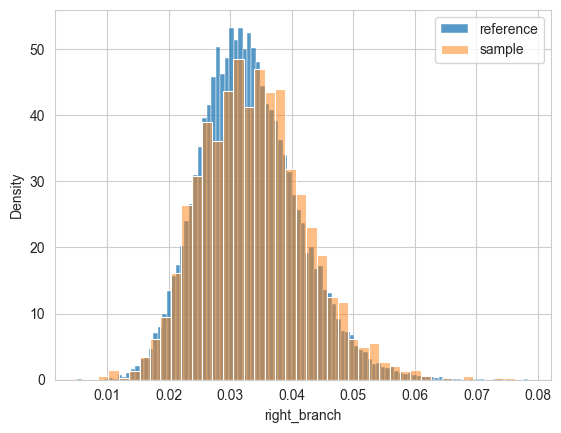

1110101111||0001010000


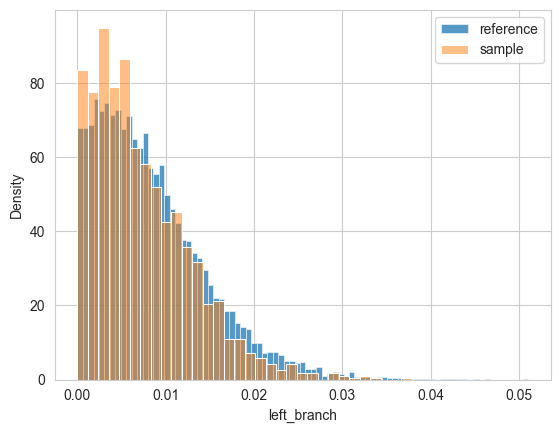

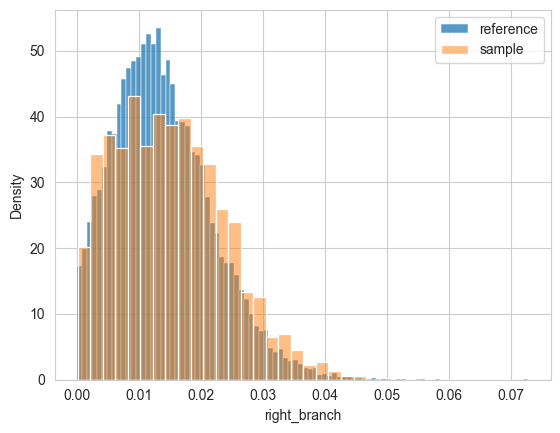

0100000011||0010000000


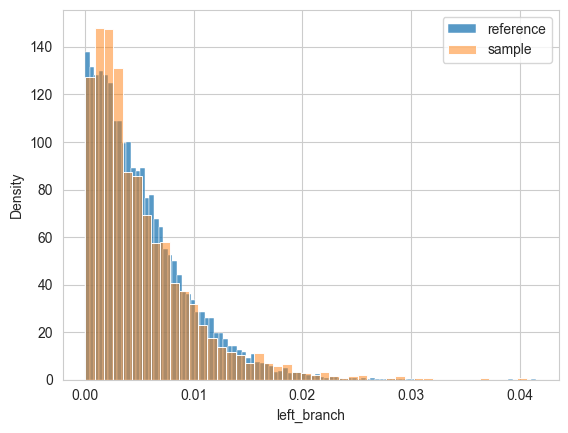

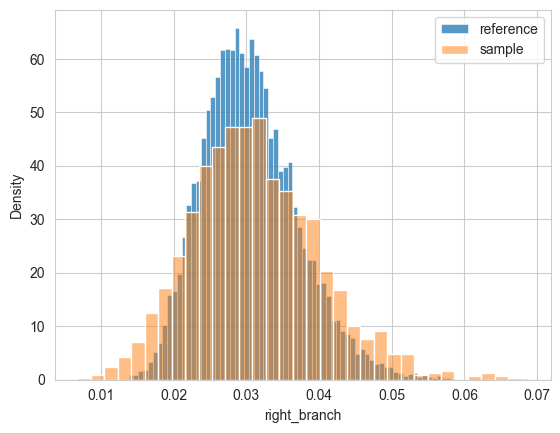

0110000001||0000000010


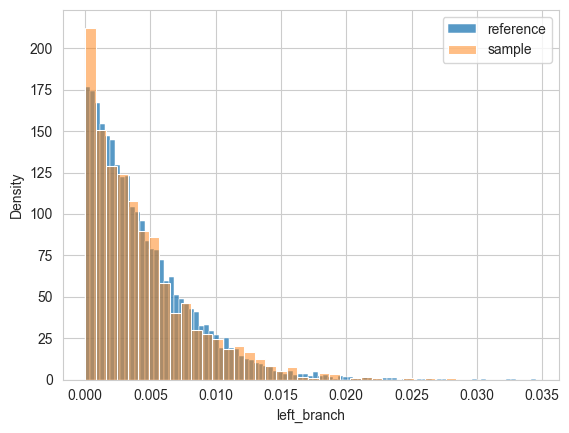

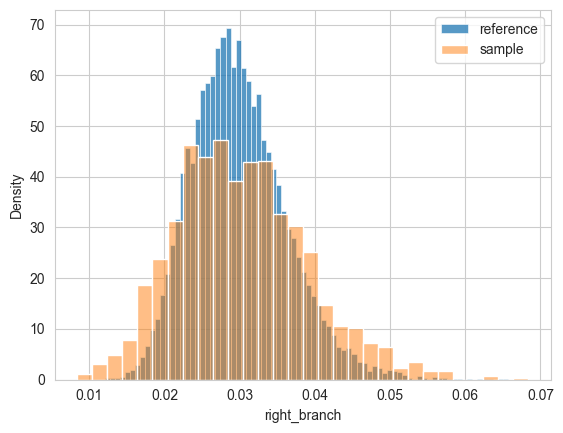

0100000001||0000000010


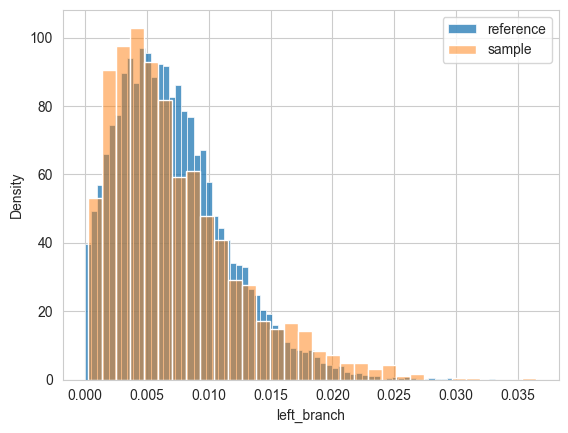

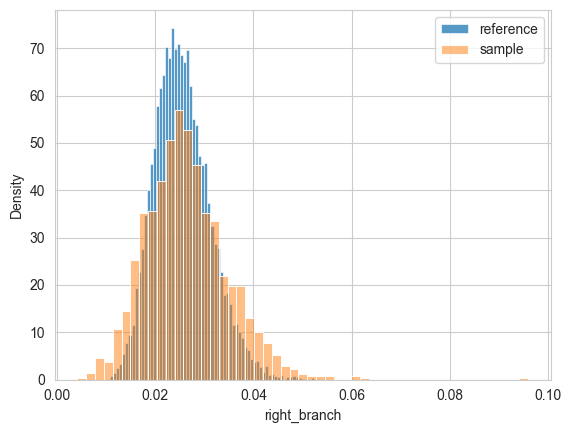

0110000011||1001111100


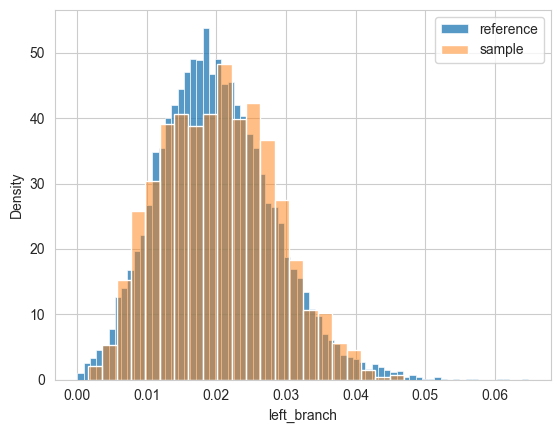

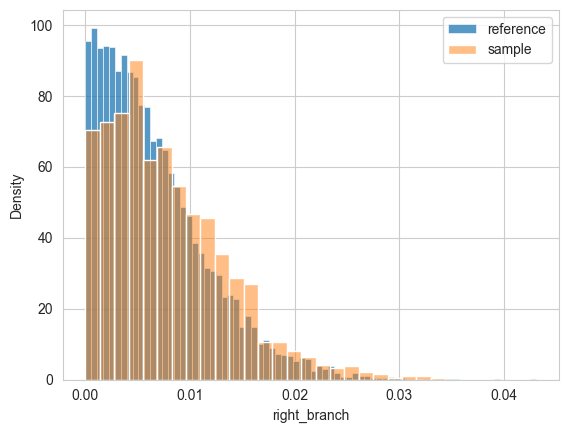

1000101100||0001010000


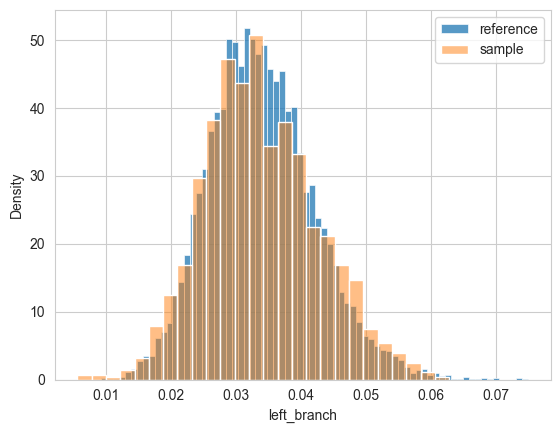

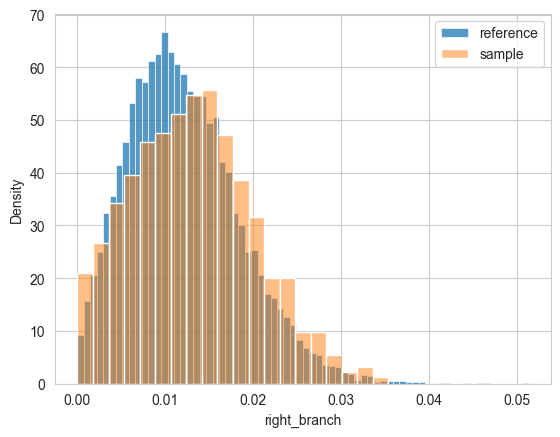

0000000001||0010000000


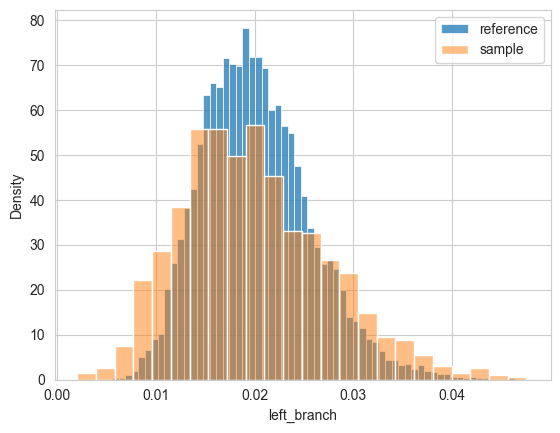

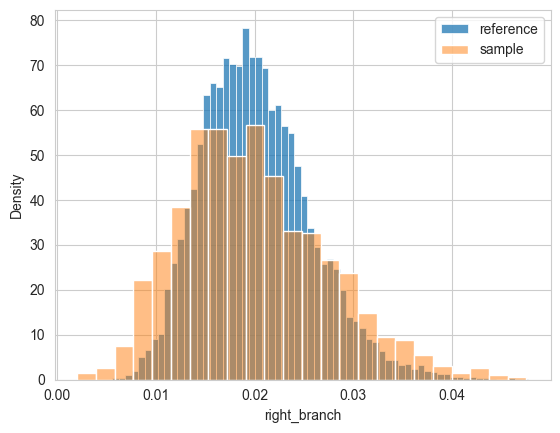

0100000001||0010000000


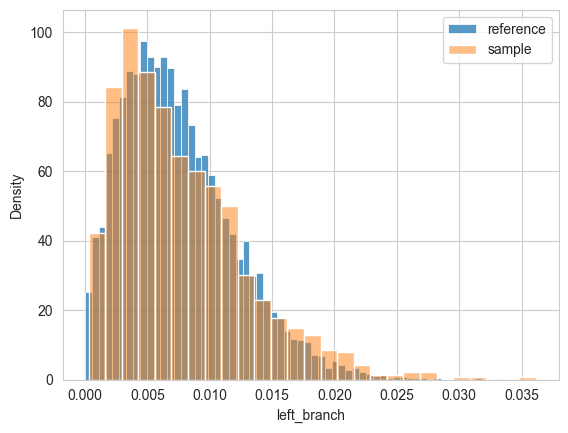

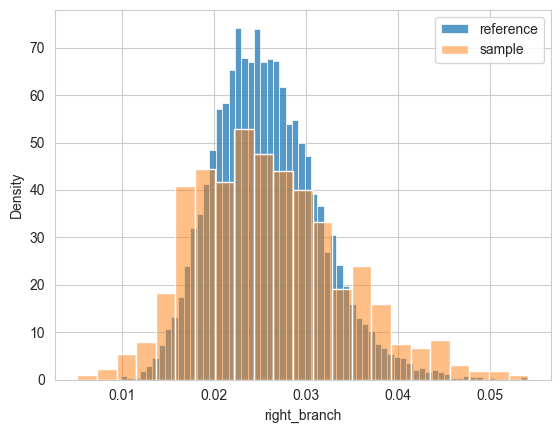

0111010011||1000101100


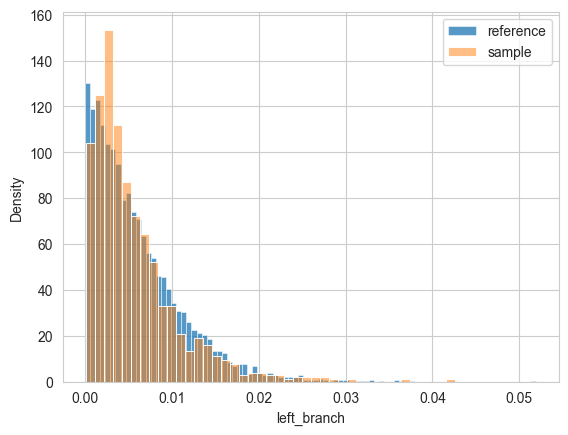

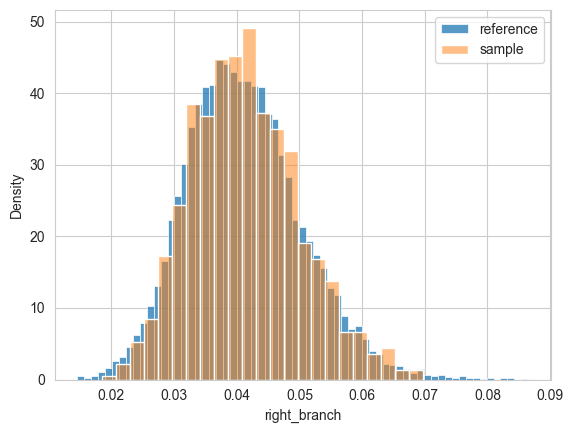

0110000011||0001010000


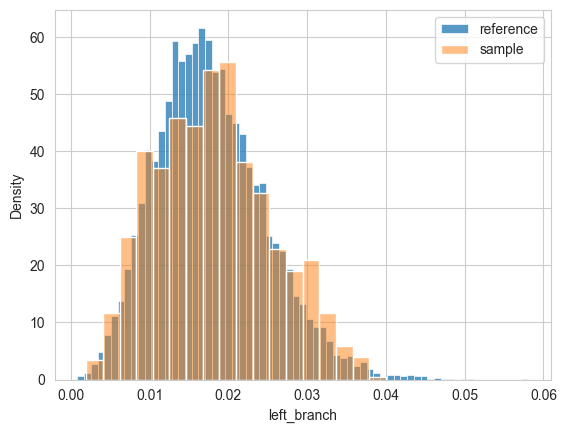

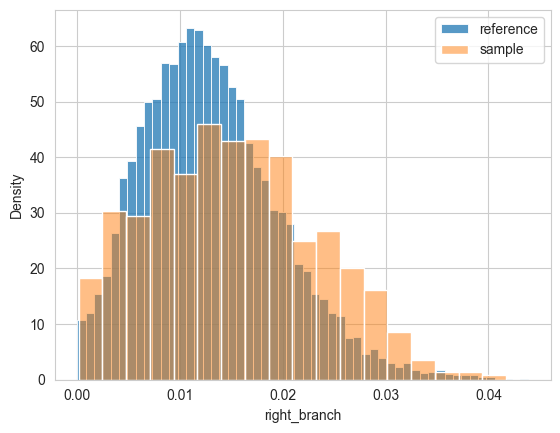

0000000010||0010000000


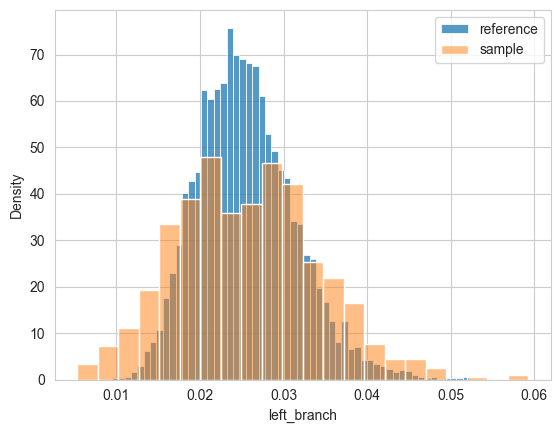

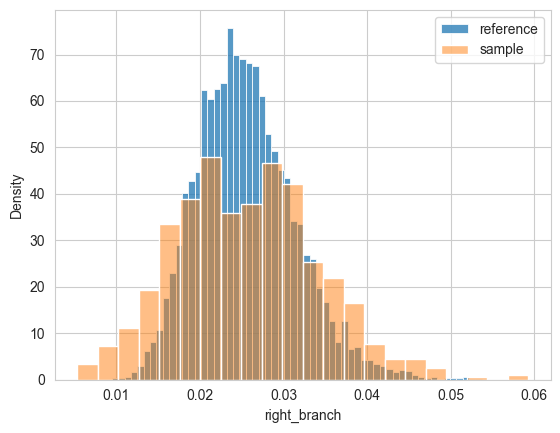

0100000001||0010000010


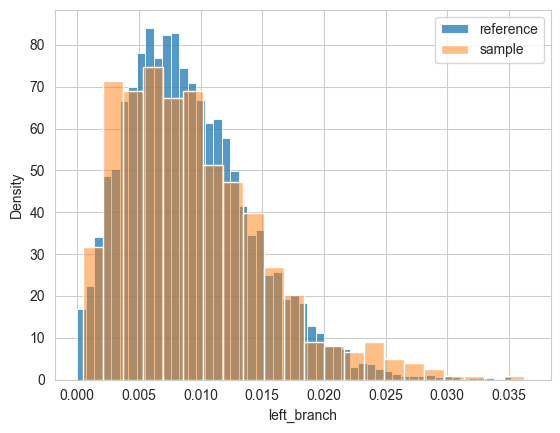

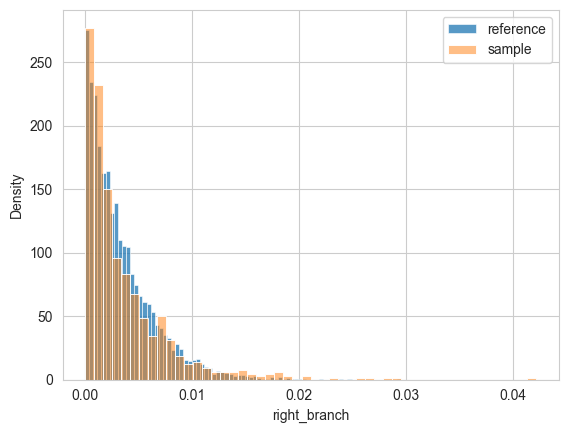

0000000010||0100000000


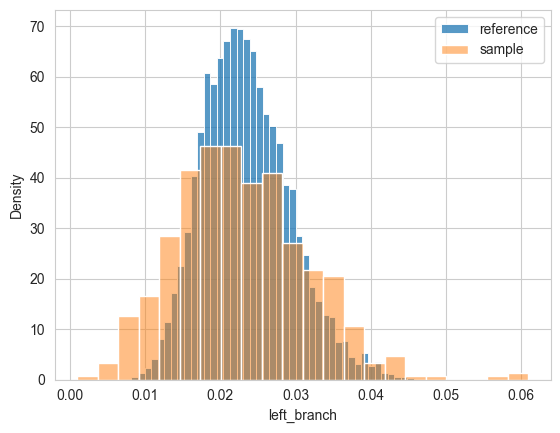

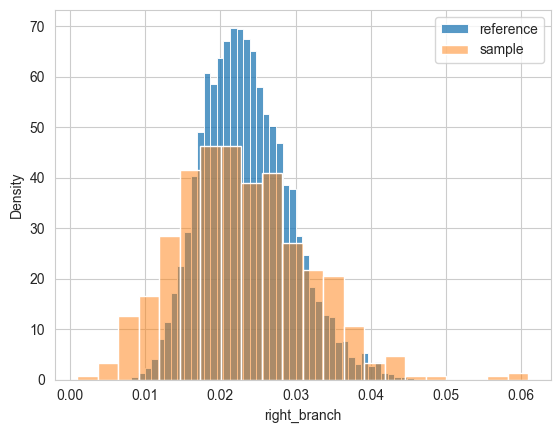

0010000011||0100000000


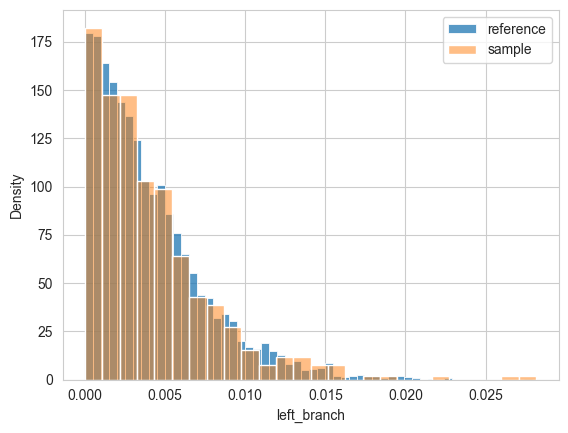

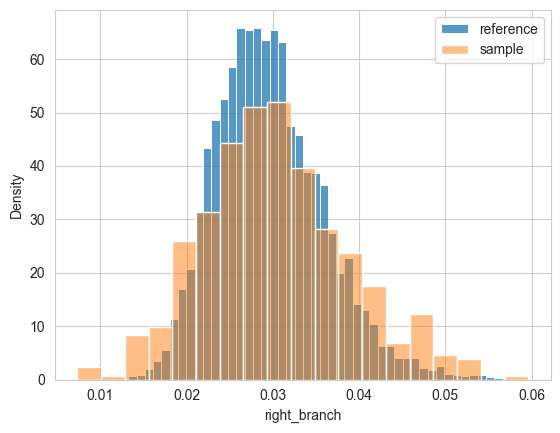

0010000001||0100000000


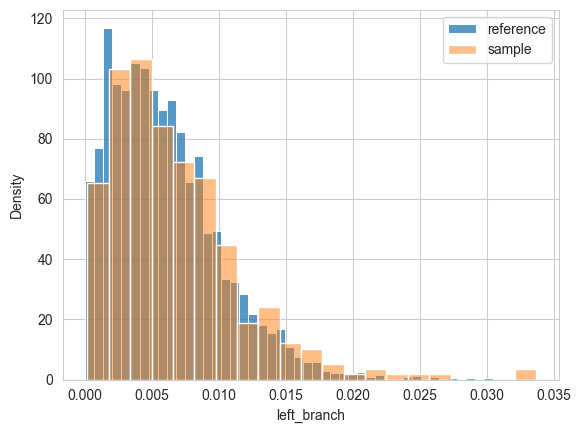

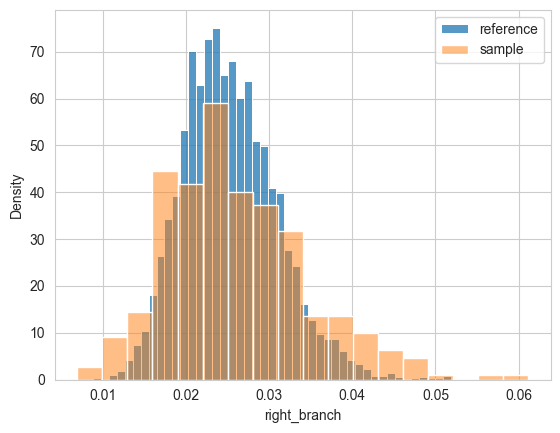

0000000100||0000001000


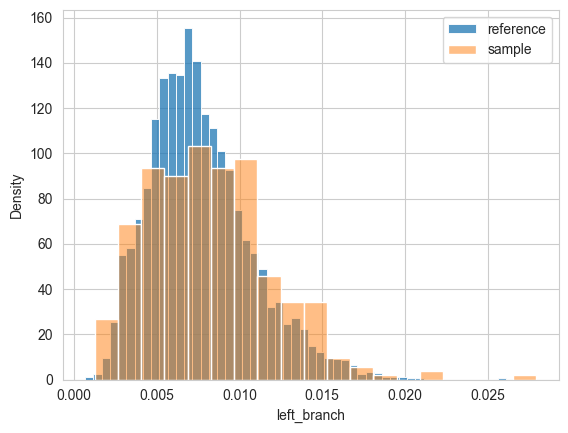

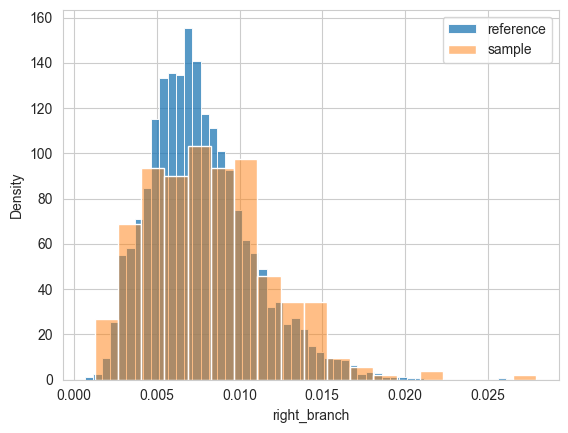

0000001100||1000100000


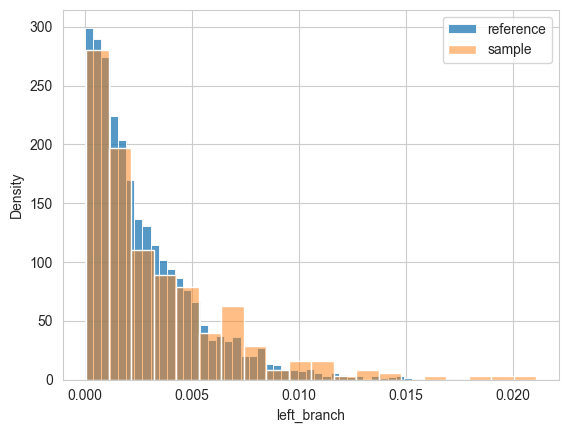

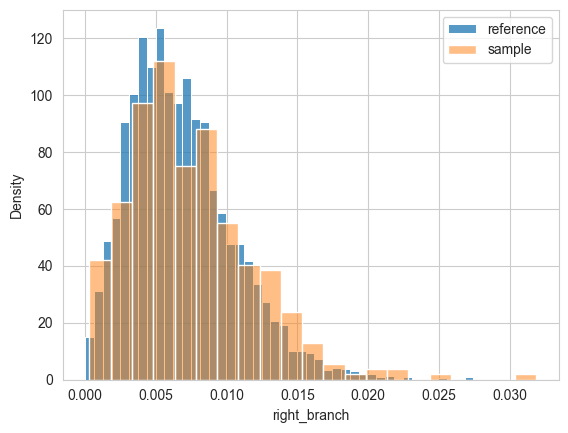

0010000001||0000000010


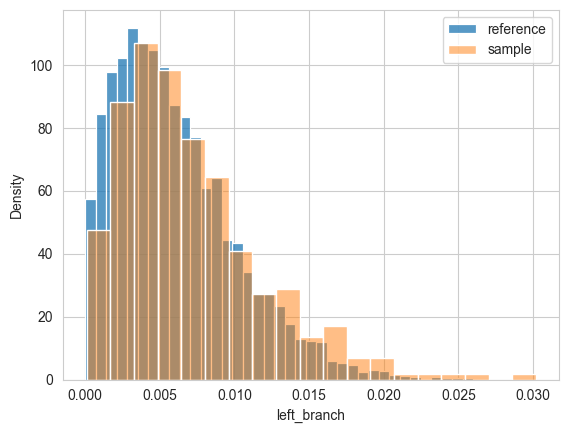

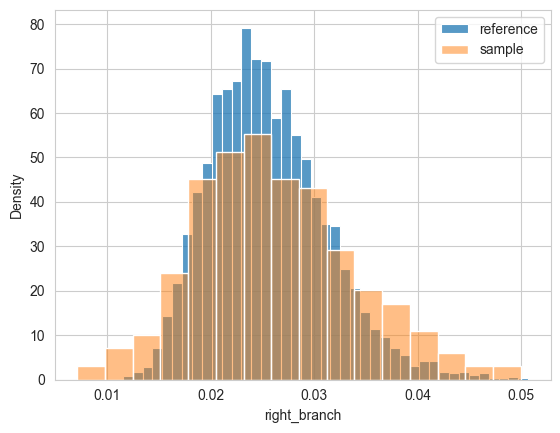

0010000001||0100000010


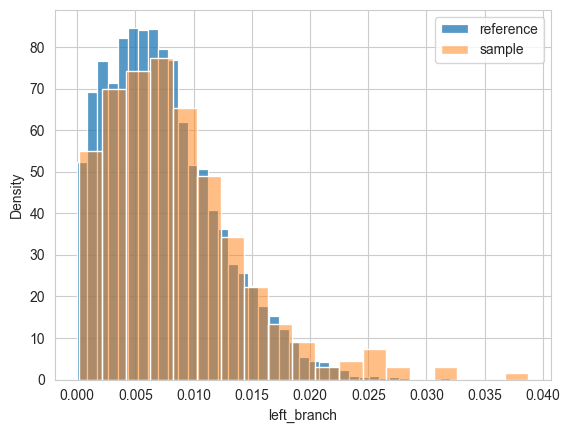

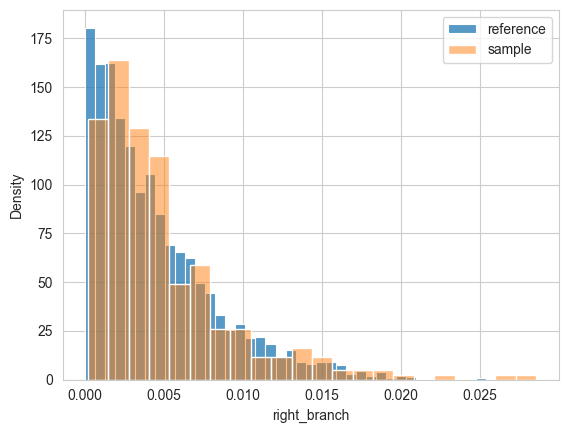

1111101111||0000010000


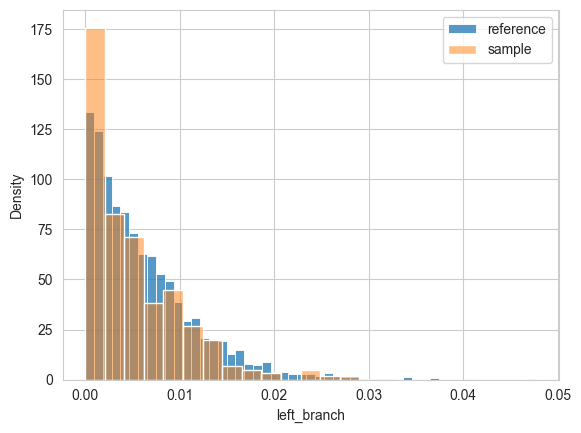

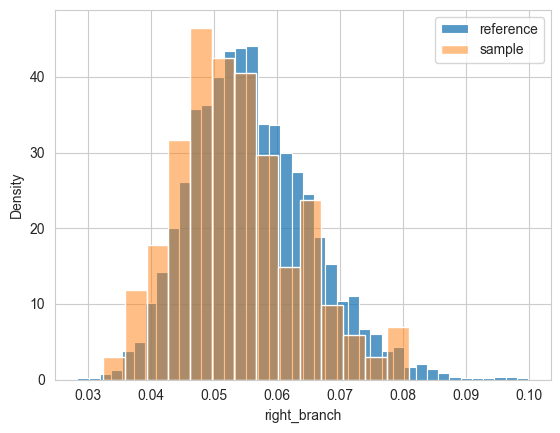

0000000100||1000101000


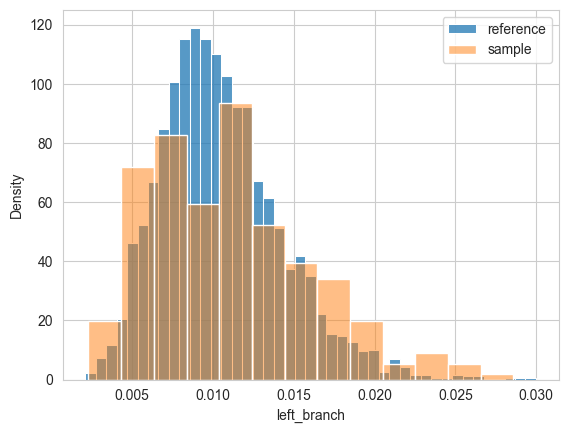

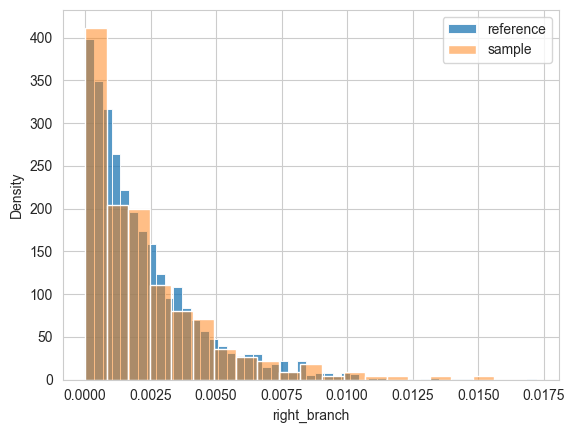

0000001000||1000100000


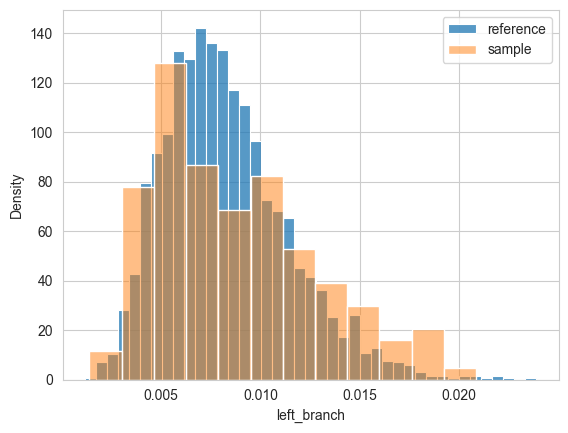

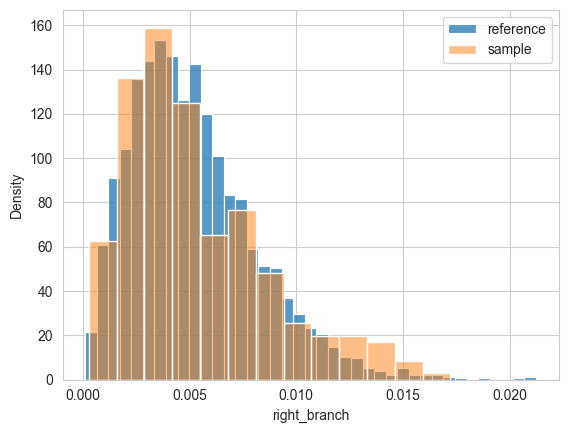

1110111111||0001000000


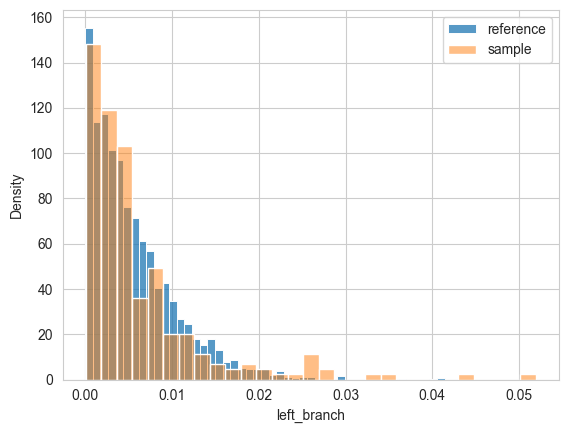

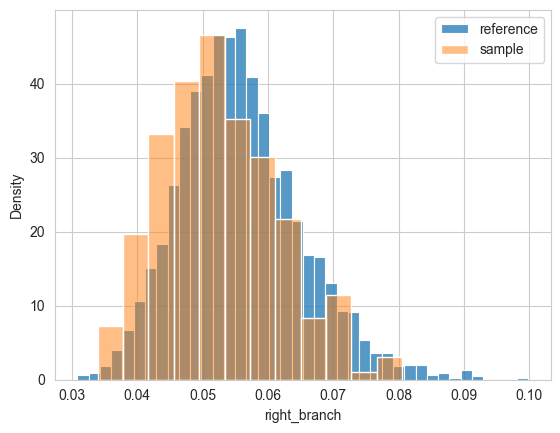

0000000001||0000000010


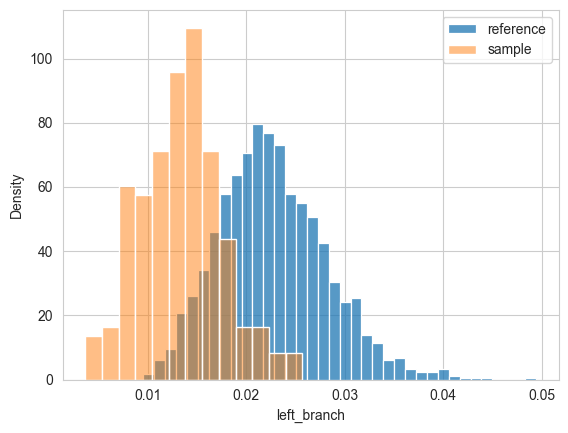

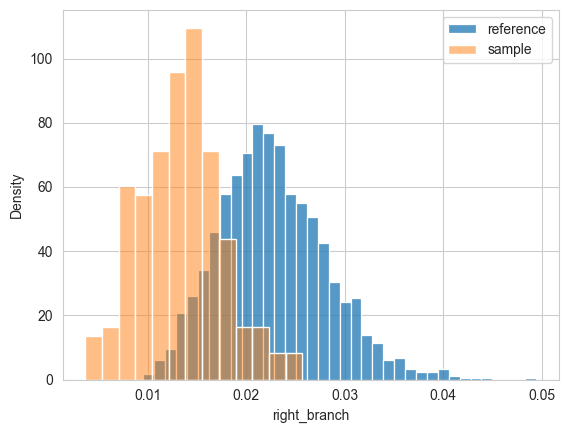

1110101111||0001000000


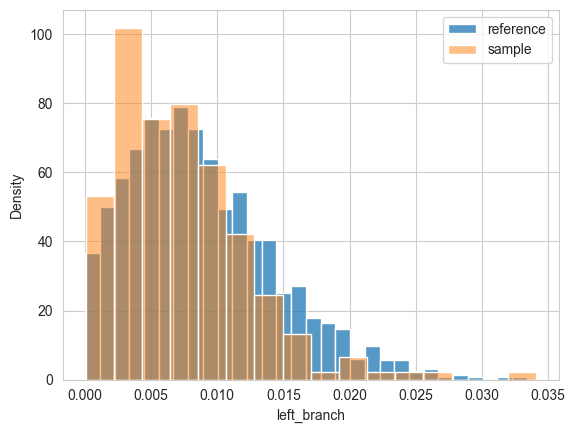

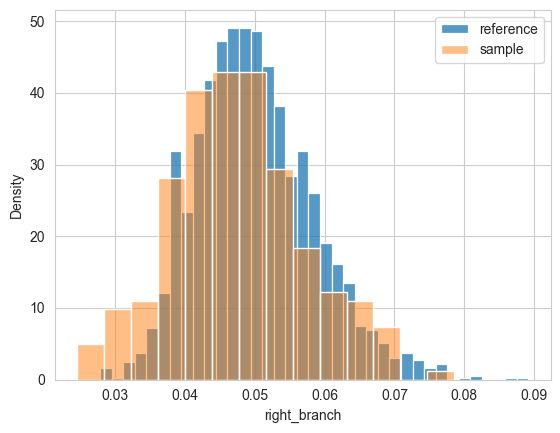

1110101111||0000010000


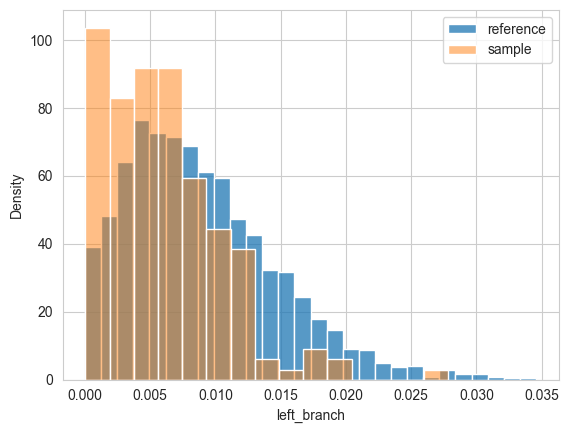

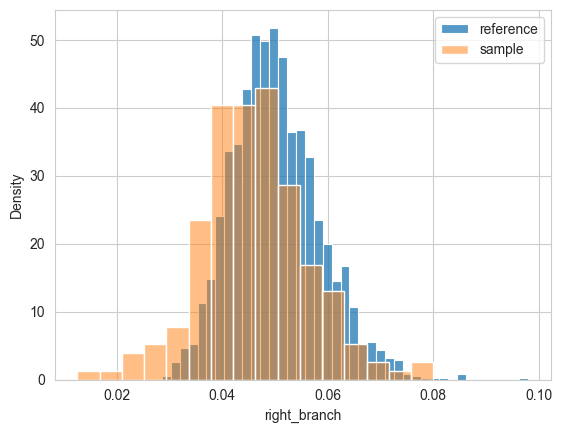

0000000001||0100000010


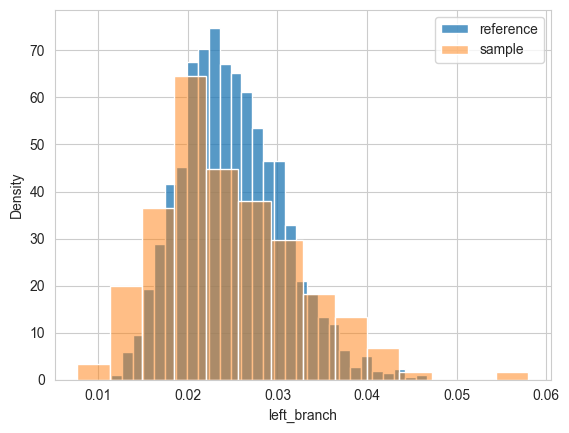

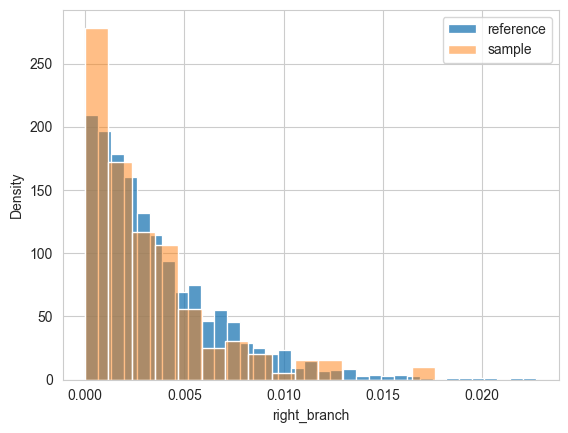

1000101100||0001000000


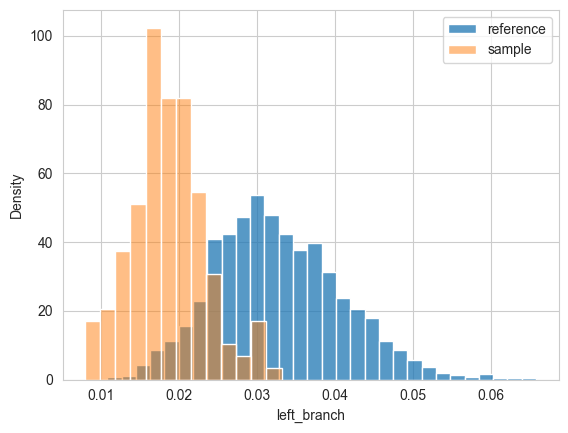

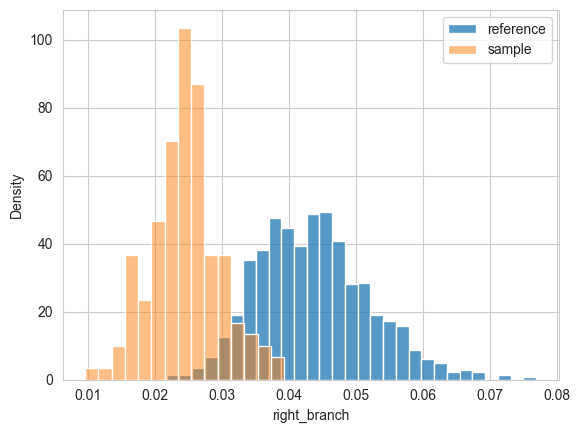

0000000011||0100000000


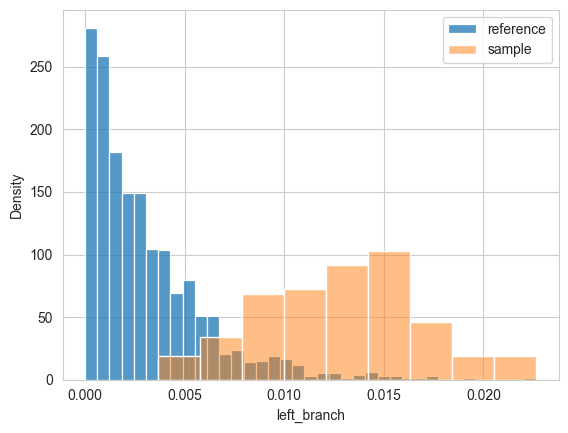

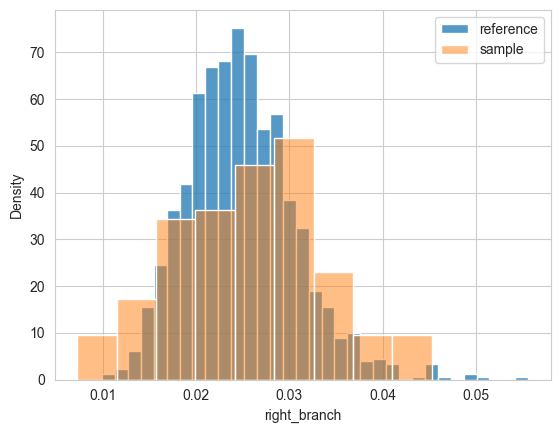

0010000000||0100000000


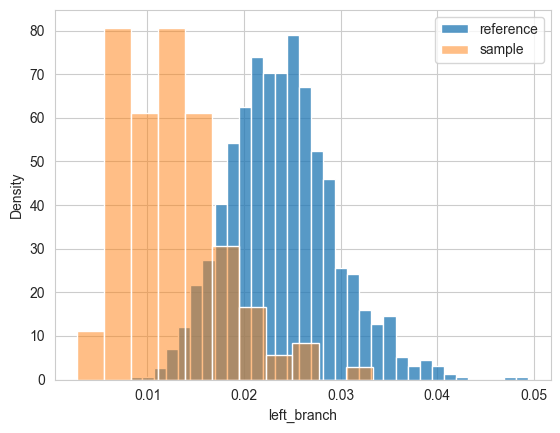

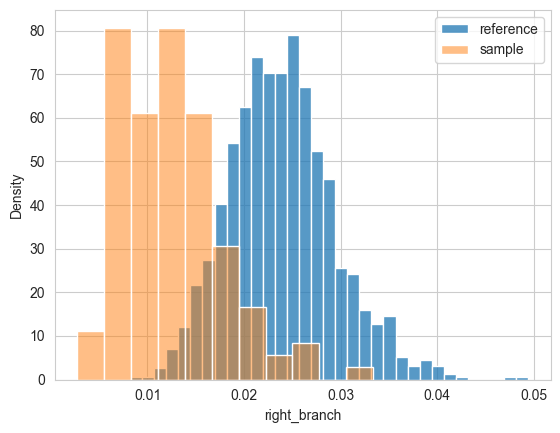

0000000100||1000000000


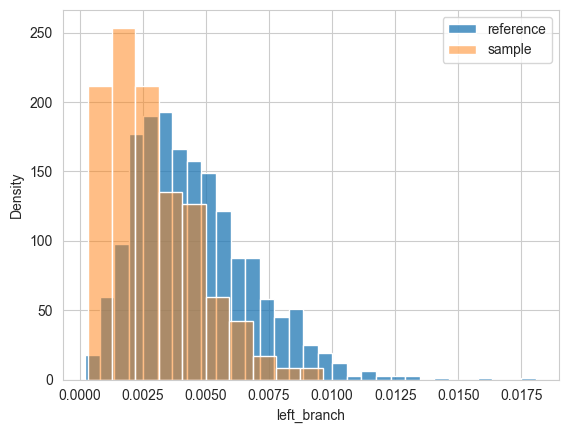

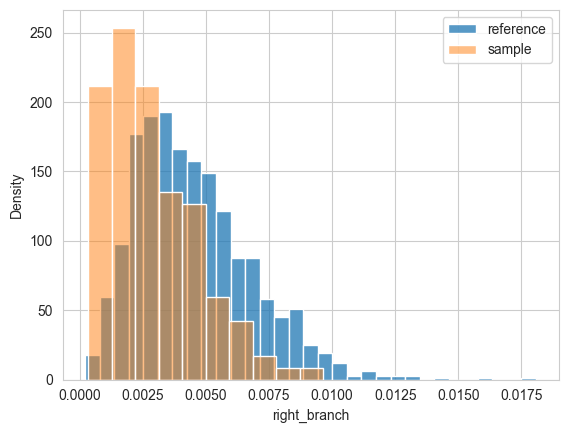

1000000100||0000100000


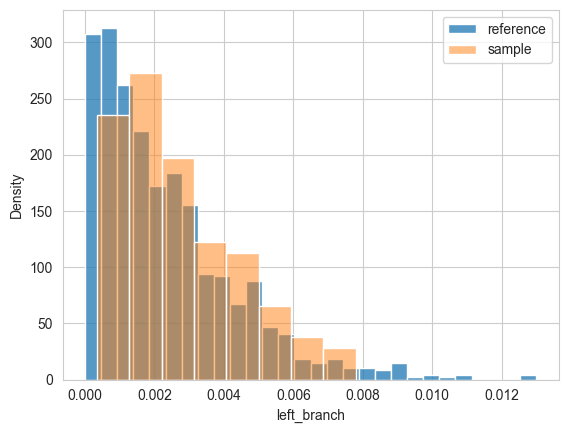

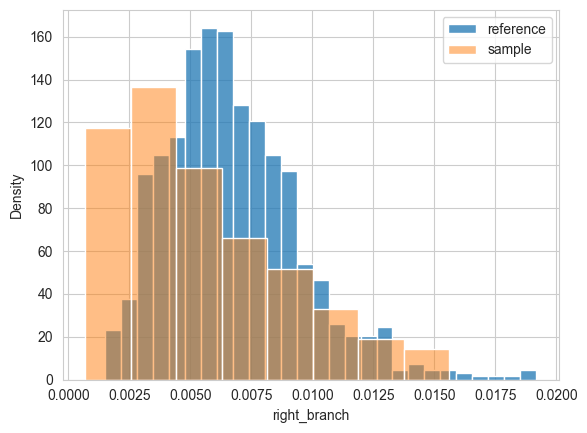

0000000001||0110000010


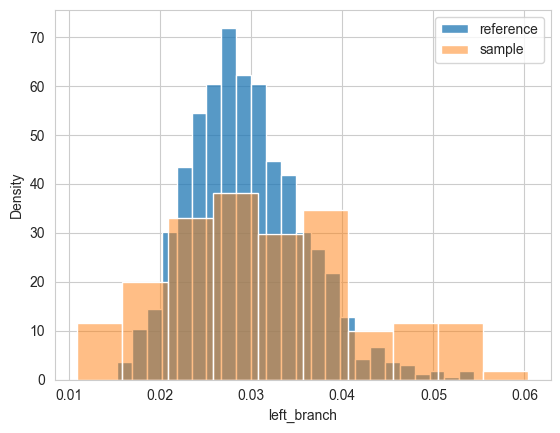

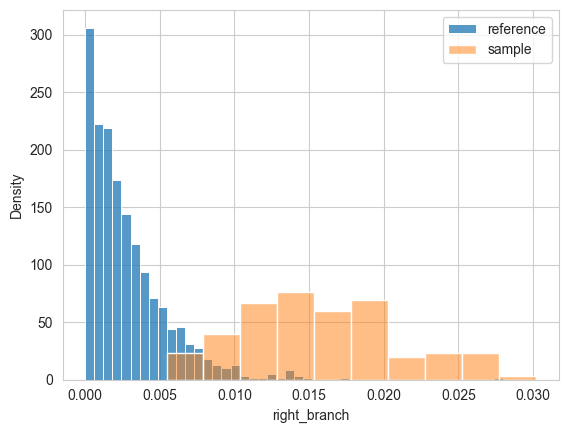

0110000011||0000010000


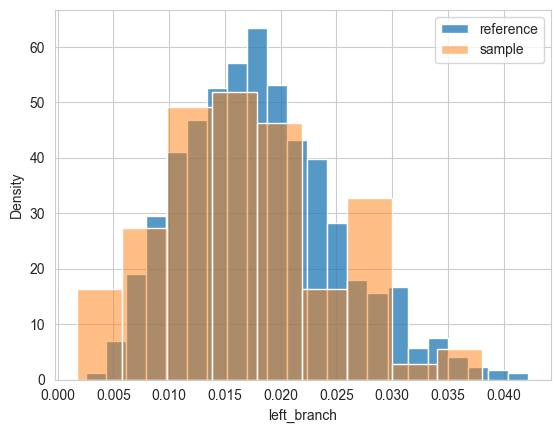

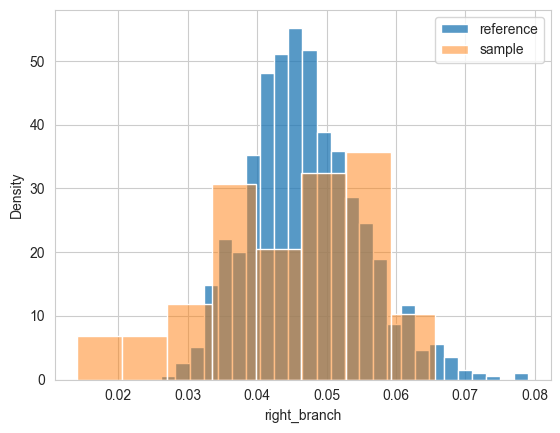

1000101100||0000010000


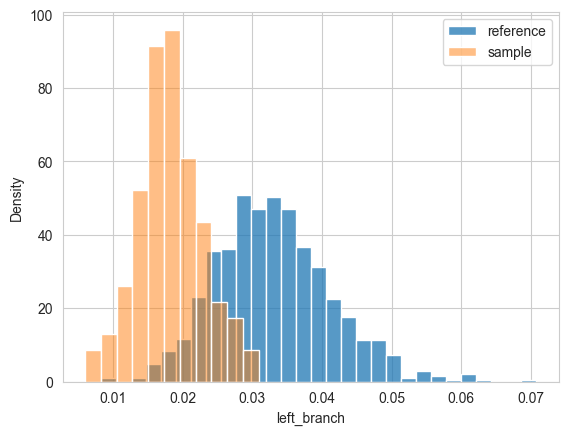

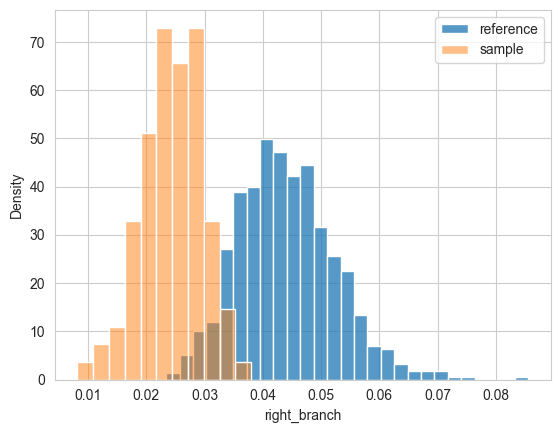

0000000100||0000100000


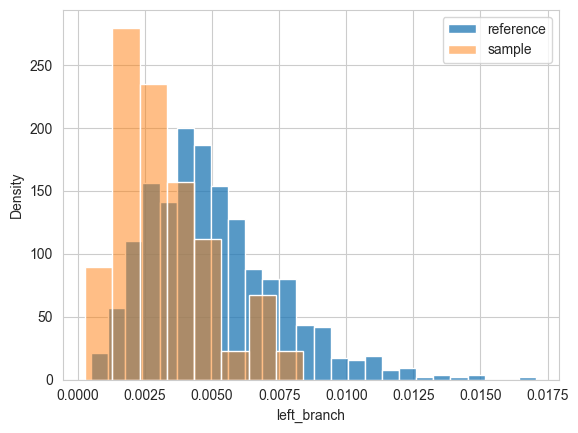

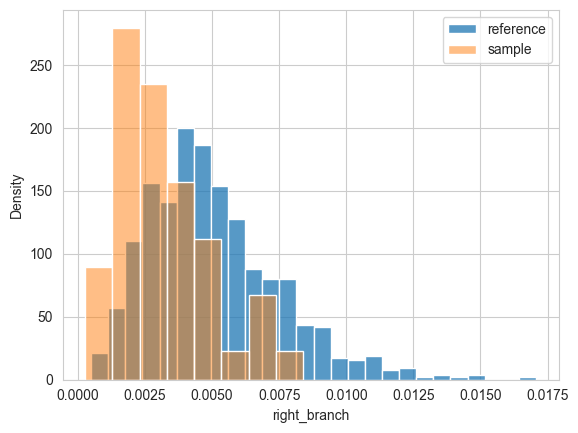

0110000011||0001000000


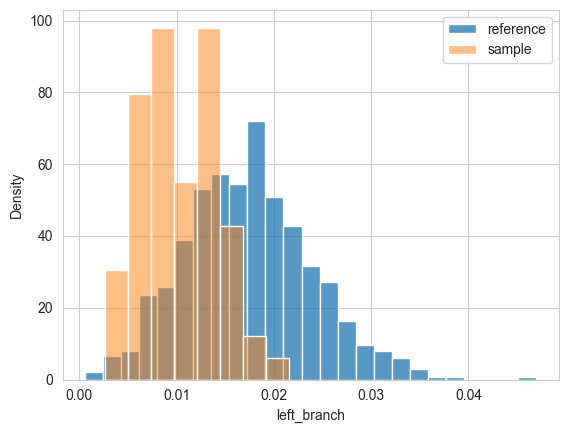

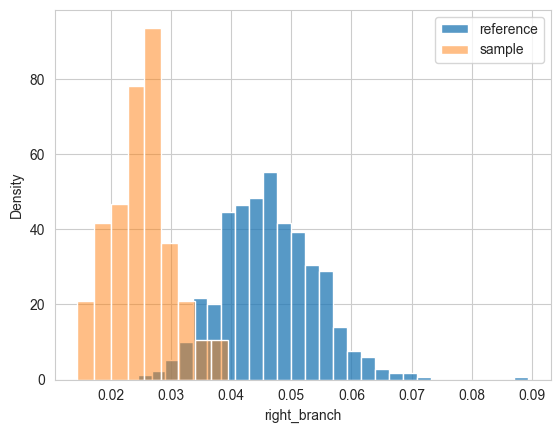

0000100100||1000000000


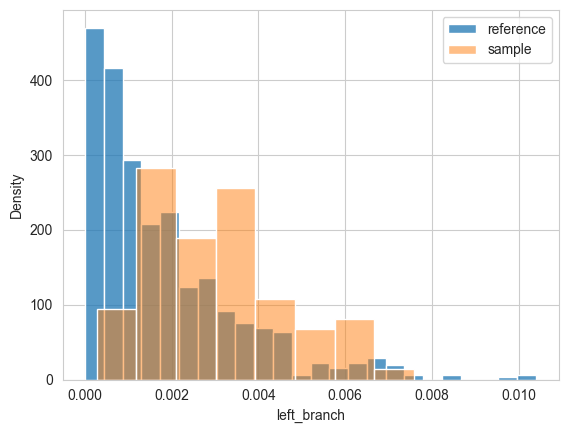

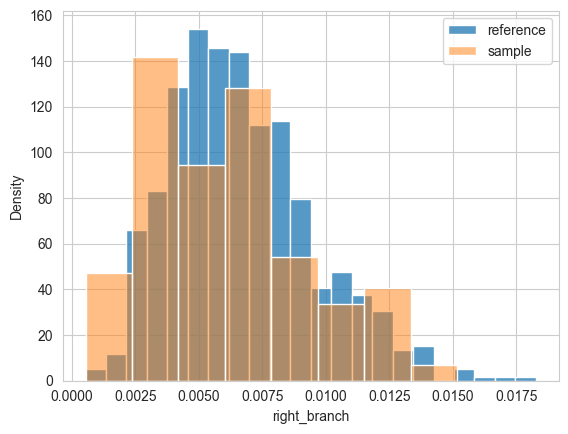

1001101100||0000010000


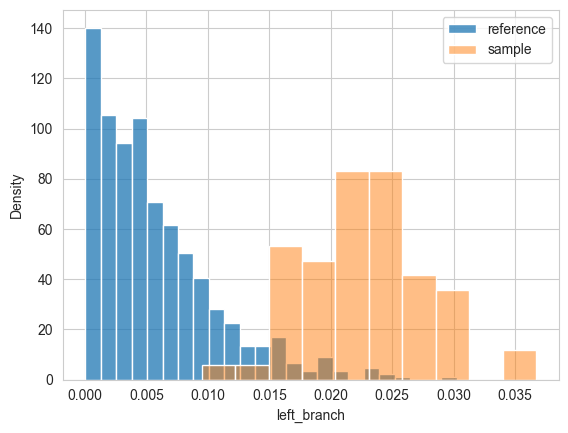

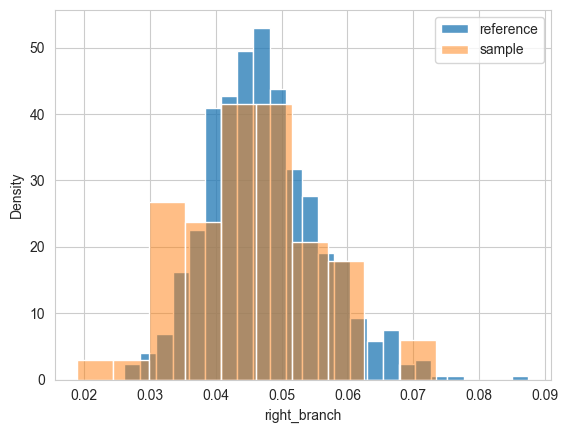

0000000011||0010000000


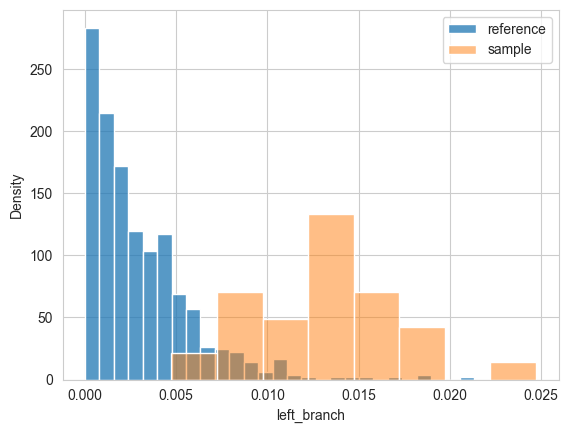

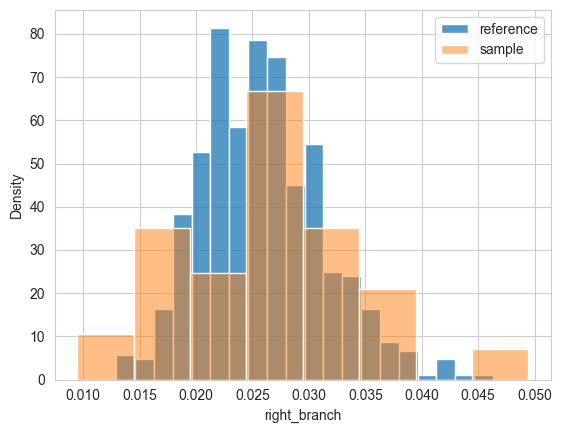

0000000001||0110000000


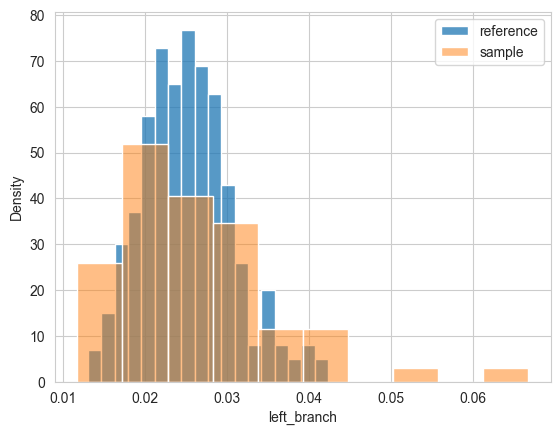

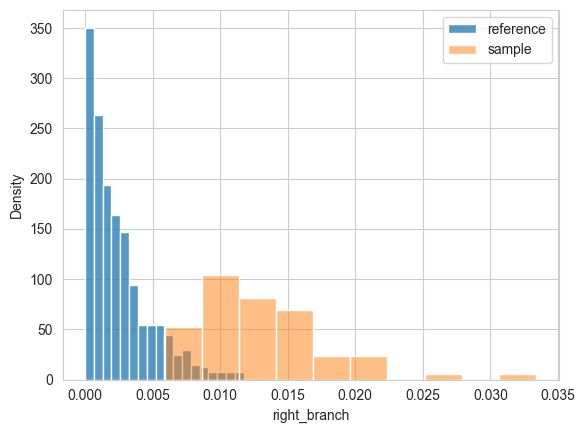

0000000001||0010000010


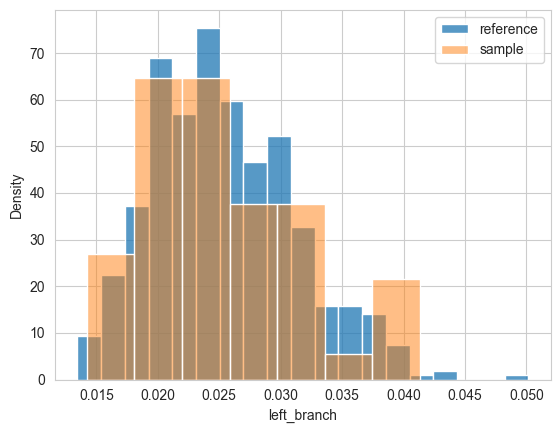

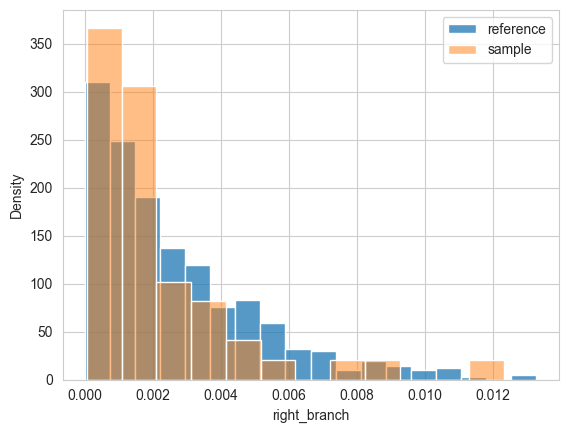

0110000011||1001101100


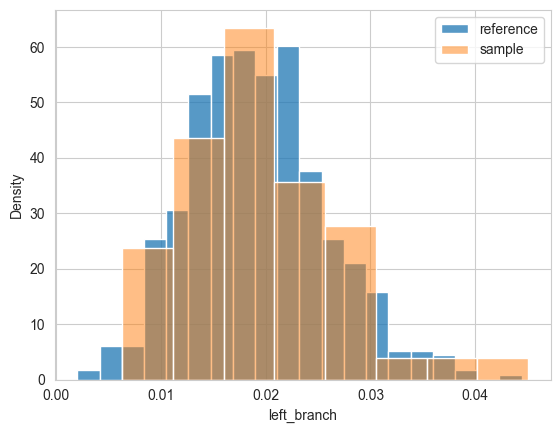

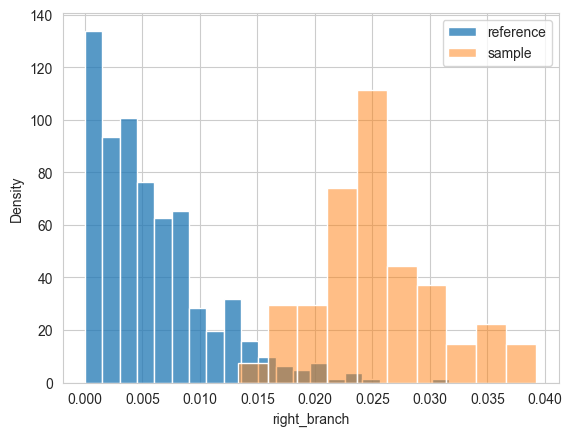

1000111100||0001000000


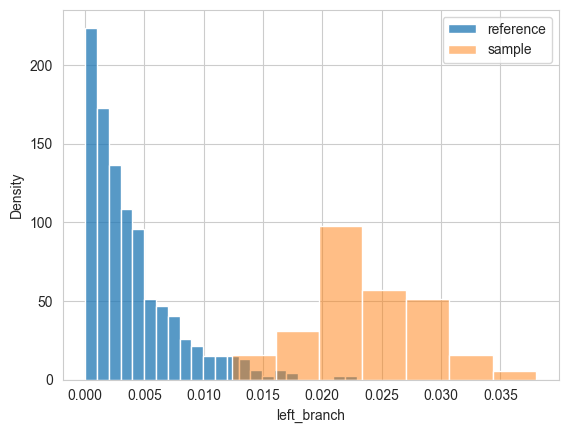

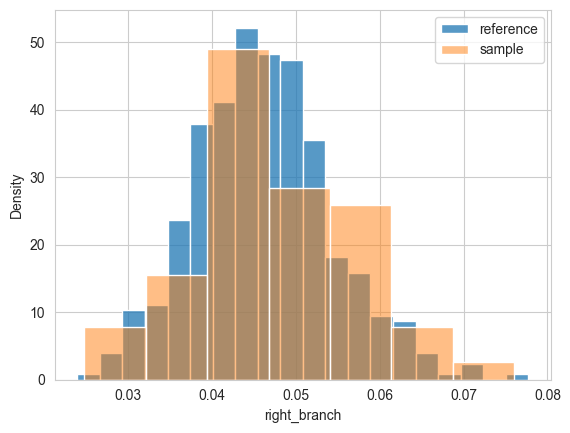

In [111]:
from collections import Counter

for clade, _ in Counter(ref_clades_df.clade).most_common(50):
    print(clade)

    sns.histplot(
        ref_branches[ref_clades_df.clade == clade], 
        x="left_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_clades_df.clade == clade], 
        x="left_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

    sns.histplot(
        ref_branches[ref_clades_df.clade == clade], 
        x="right_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_clades_df.clade == clade], 
        x="right_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()



<Axes: ylabel='Density'>

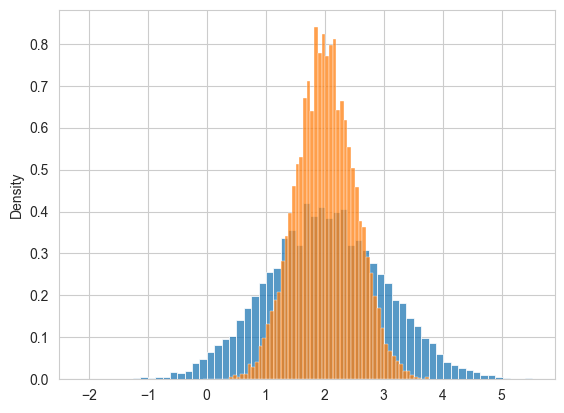

In [112]:
import numpy as np
import seaborn as sns
x = np.random.normal(2, 1, 10000)

sns.histplot(x, stat="density",)

y = (x - np.mean(x)) * 0.5 + np.mean(x)

sns.histplot(y, stat="density",)

In [113]:
log_ref_heights = np.log(ref_tree_heights)
log_sample_heights = np.log(sample_tree_heights)

In [114]:
x = np.random.normal(np.mean(log_ref_heights), np.std(log_ref_heights), 100000)

<Axes: ylabel='Density'>

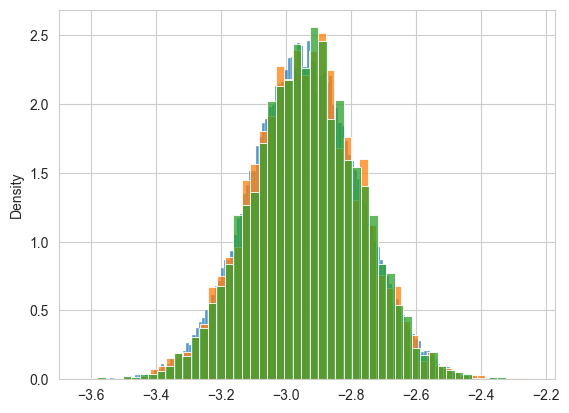

In [115]:
sns.histplot(x, stat="density")
sns.histplot(log_ref_heights, stat="density")
sns.histplot(log_sample_heights, stat="density")